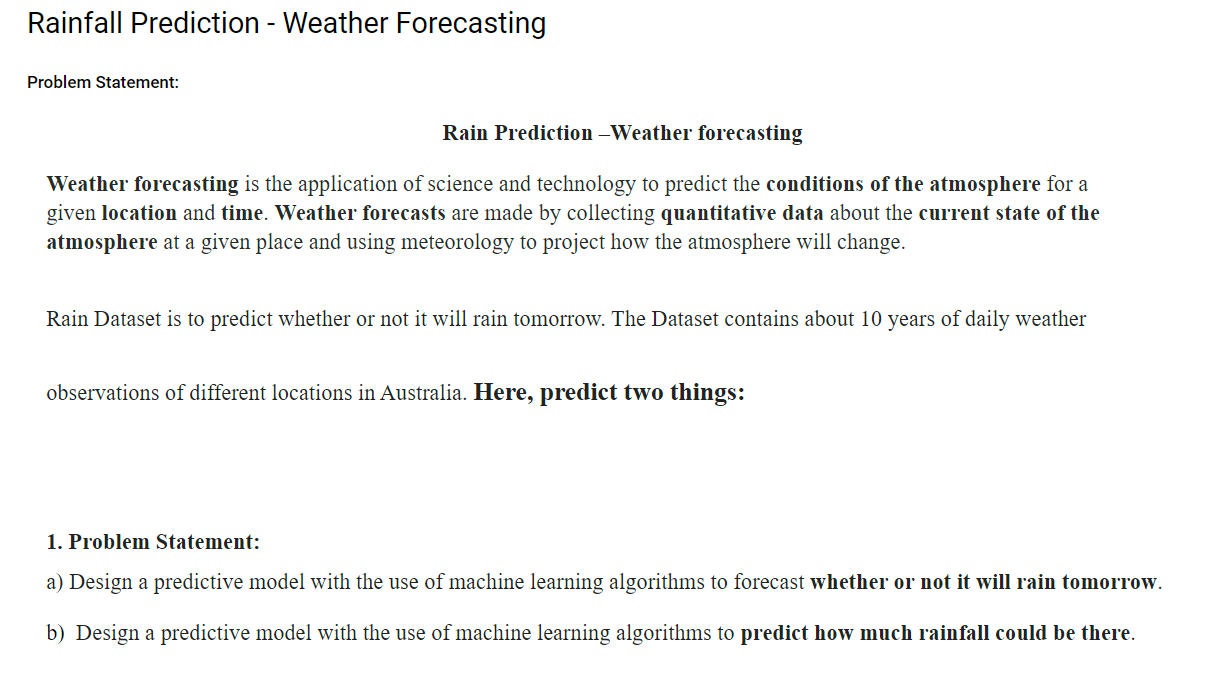

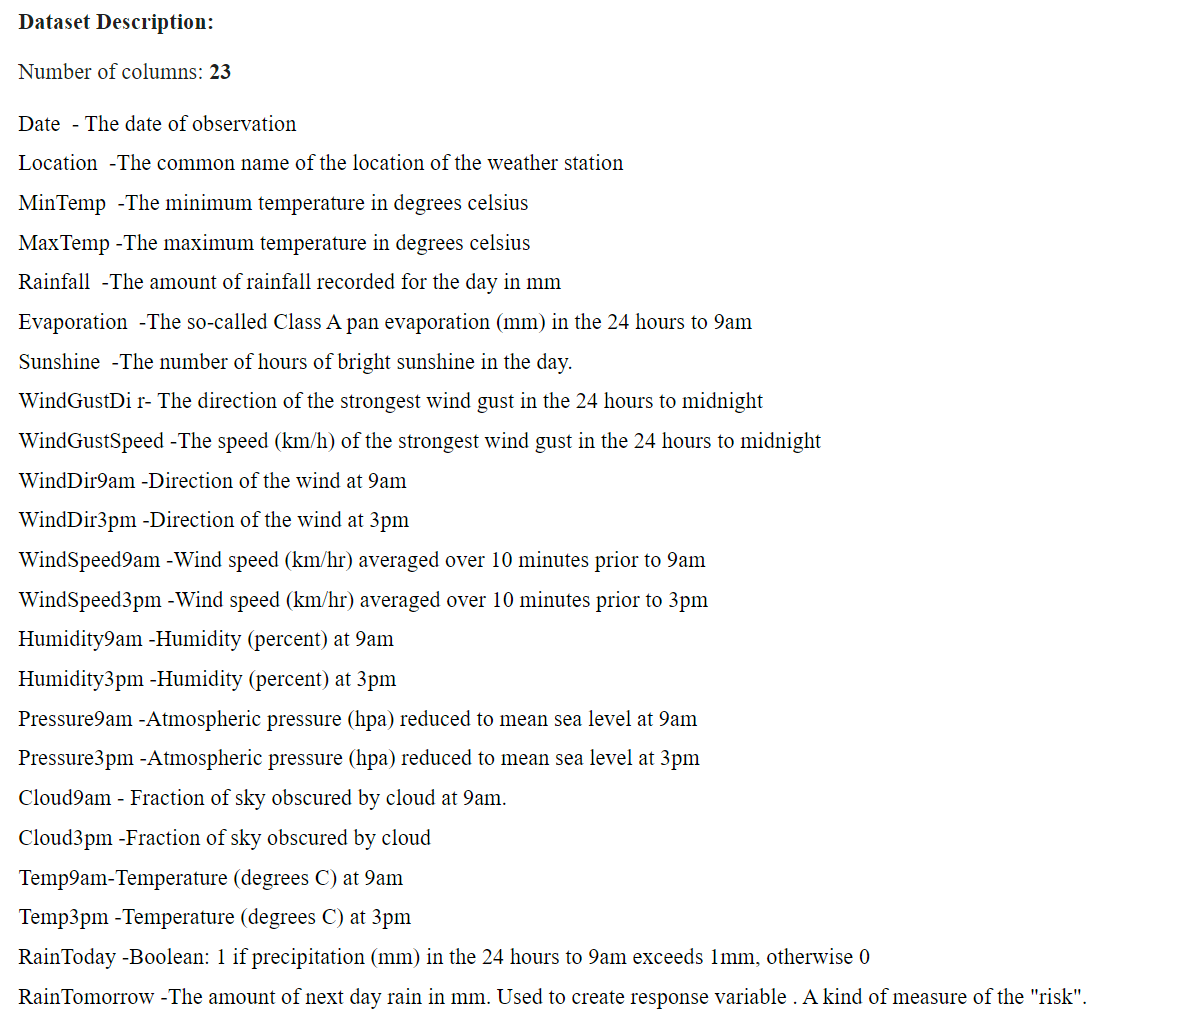

# Rain Fall Prediction

In [56]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN

In [5]:
df.shape

(8425, 23)

In [59]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Observation

this dataset has 8425 rows and 23 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Observation

We have float,and object data in dataset. we should do encoding for object data

In [4]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

# observation

comparing 50% and mean we can see Rainfall Evaporation have skewness

comparing 75% and max almost all columns have outliers

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# null value check

<AxesSubplot:>

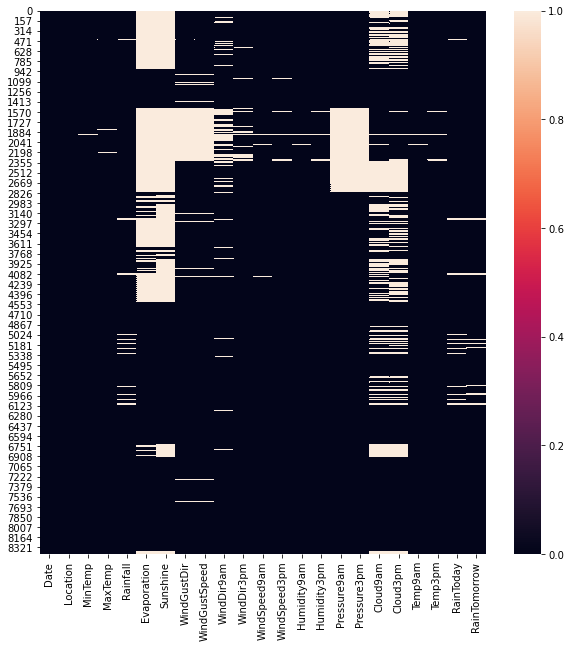

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         3994
Evaporation      3512
Cloud3pm         2455
Cloud9am         2421
Pressure3pm      1312
Pressure9am      1309
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
RainToday         240
Rainfall          240
RainTomorrow      239
WindSpeed3pm      107
Humidity3pm       102
Temp3pm            96
WindSpeed9am       76
MinTemp            75
MaxTemp            60
Humidity9am        59
Temp9am            56
Location            0
Date                0
dtype: int64

In [7]:
df.shape

(8425, 23)

# observation

We have null values so we will proceed to treat them

# null value treatment

I am using Simple Imputer to treat Null values

In [8]:
from sklearn.impute import SimpleImputer
numerical=['Sunshine','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','WindGustSpeed','Rainfall','WindSpeed3pm','Humidity3pm',
           'Temp3pm','WindSpeed9am','MinTemp','MaxTemp','Humidity9am','Temp9am',
          'Evaporation']
categorical=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [9]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [10]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# observation

null values are treated using simple imputer

# univariate analysis

<AxesSubplot:xlabel='Location', ylabel='count'>

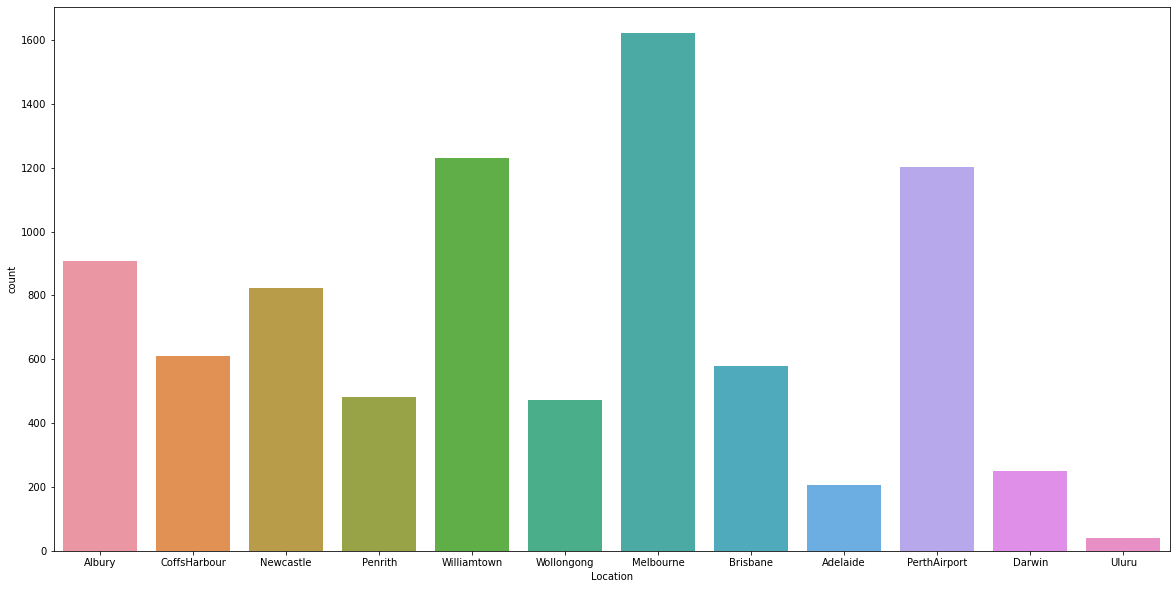

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df['Location'])

# observation

Melbourne  data is higher compared to others

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

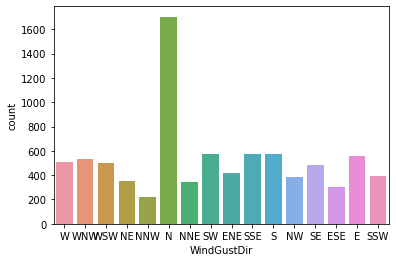

In [16]:
sns.countplot(df['WindGustDir'])

# observation

WindgustDir has N (north) data higher compared to others

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

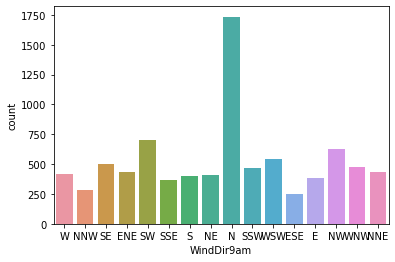

In [18]:
sns.countplot(df['WindDir9am'])

# observation

WindDir9am has N (north) data higher compared to others

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

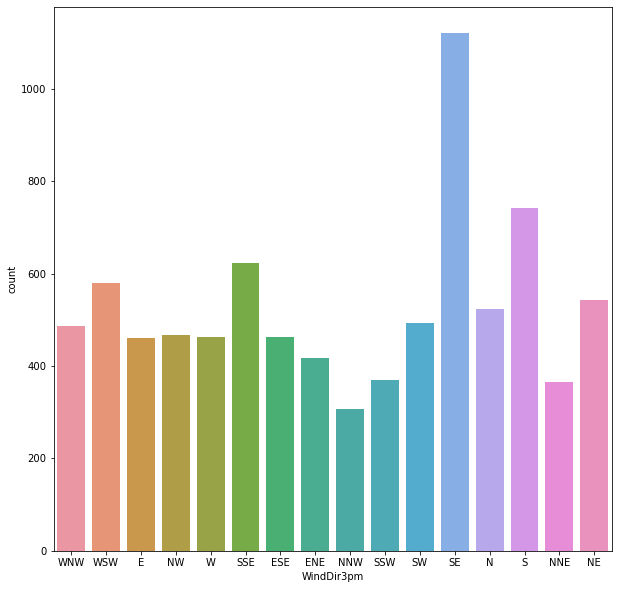

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['WindDir3pm'])

# observation

'WindDir3pm'has SE (southEast) data higher compared to others

<AxesSubplot:xlabel='RainToday', ylabel='count'>

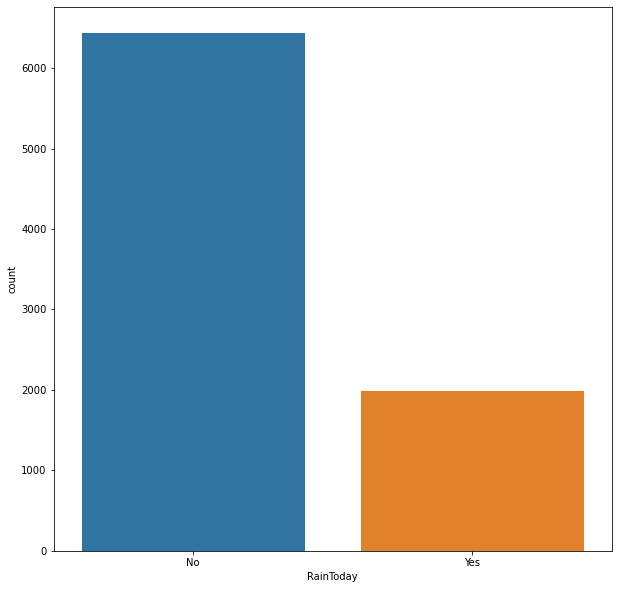

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(df['RainToday'])

# Observation

Rain Today has No data higher compared to yes

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

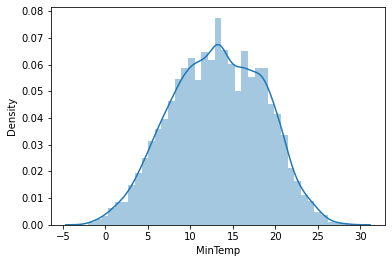

In [23]:
sns.distplot(df['MinTemp'])

# observation

'MinTemp'is normally distributed

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

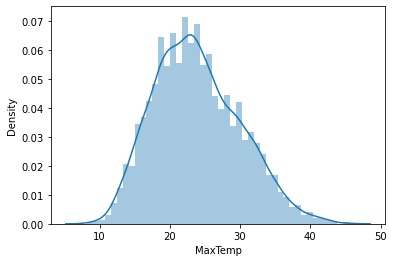

In [25]:
sns.distplot(df['MaxTemp'])

# observation

'MaxTemp' is normally distributed

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

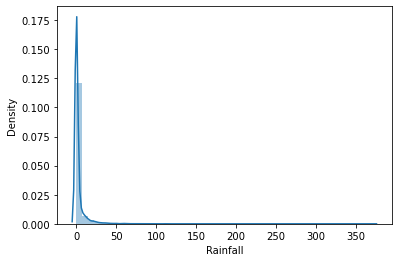

In [26]:
sns.distplot(df['Rainfall'])

# observation



'Rainfall' is positively skewed

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

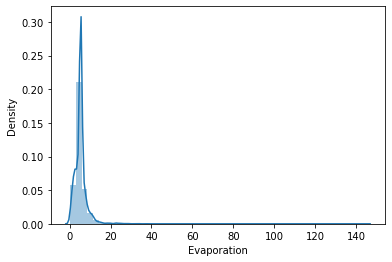

In [28]:
sns.distplot(df['Evaporation'])

# observation

'Evaporation' is also positively skewed

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

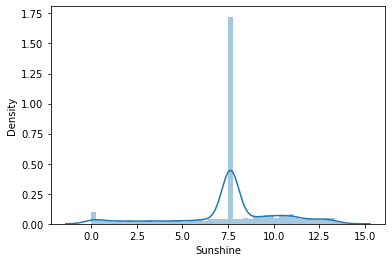

In [29]:
sns.distplot(df['Sunshine'])

# observation

Sunshine is normally distributed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

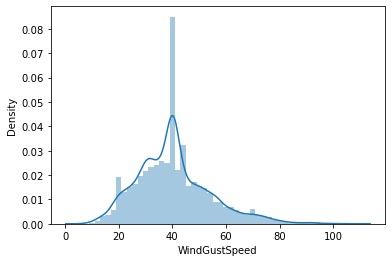

In [30]:
sns.distplot(df['WindGustSpeed'])

# observation

'WindGustSpeed'  is positively skewed

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

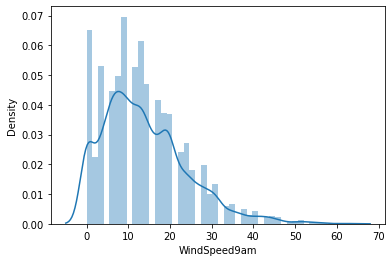

In [31]:
sns.distplot(df['WindSpeed9am'])

# Observation

'WindSpeed9am' is also positively skewed

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

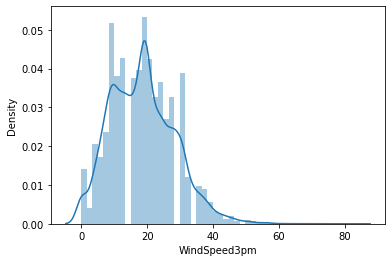

In [34]:
sns.distplot(df['WindSpeed3pm'])

# Observation

'WindSpeed3pm' is also positvely skewed

# using for loop to plot others

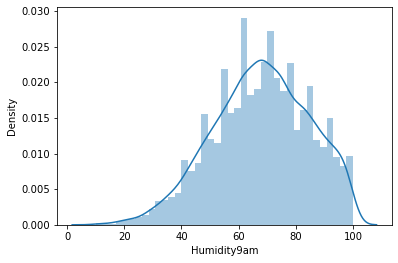

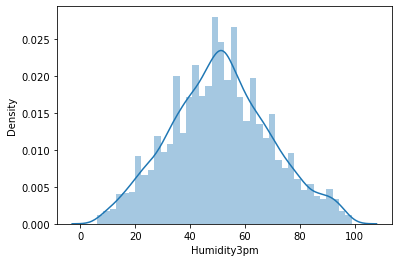

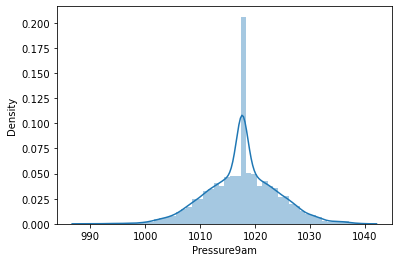

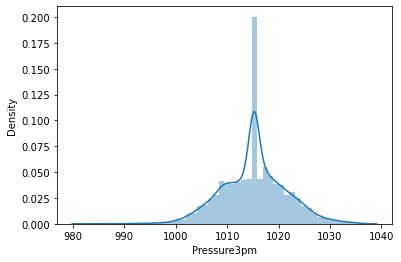

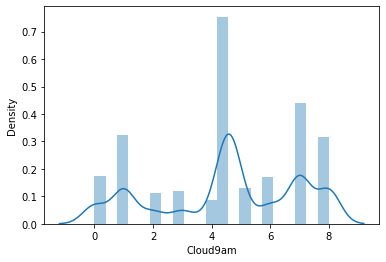

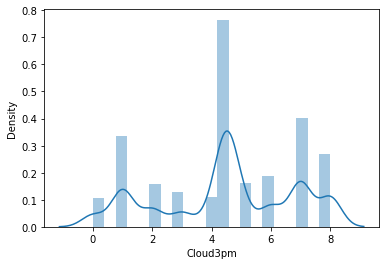

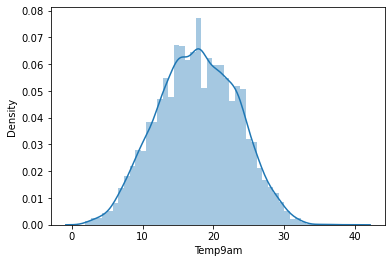

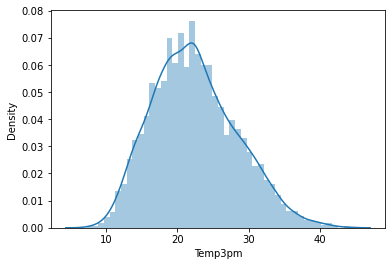

In [40]:
sk=['Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i in sk:
    sns.distplot(df[i])
    plt.show()

# observations

Pressure_3pm,Pressure9am,humidity9am Negatively skewed

<AxesSubplot:>

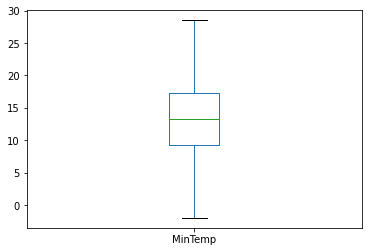

In [44]:
df['MinTemp'].plot.box()

# Observation

No outliers detected

In [45]:
sk= [ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

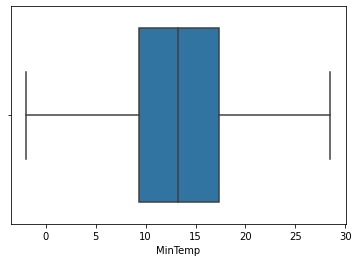

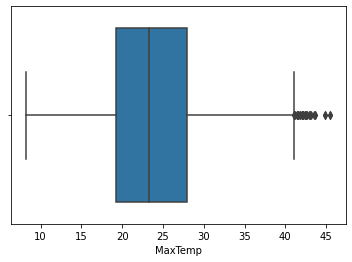

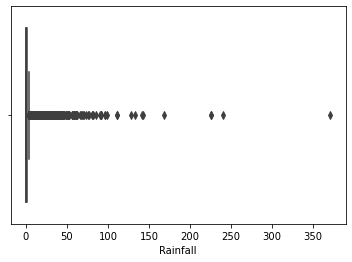

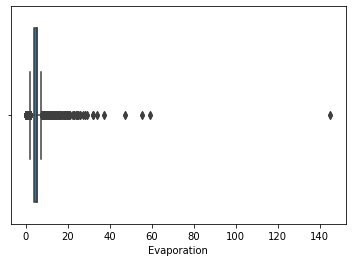

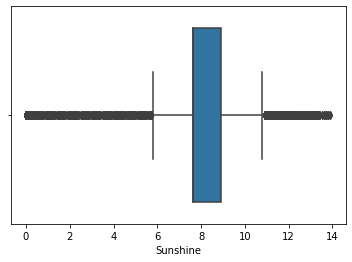

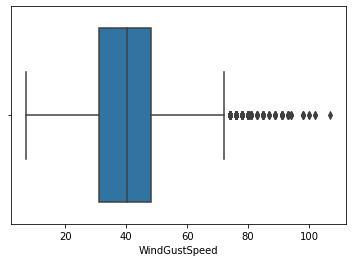

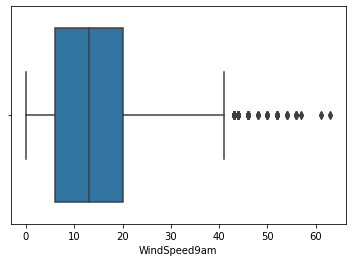

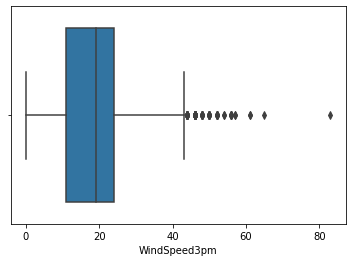

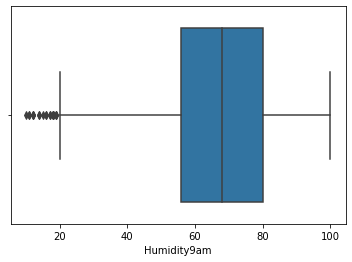

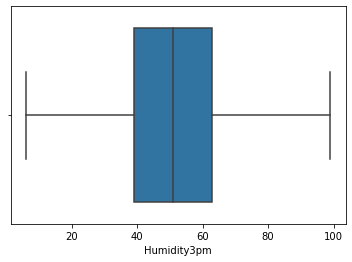

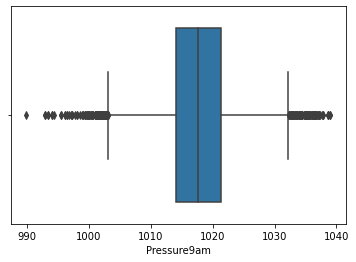

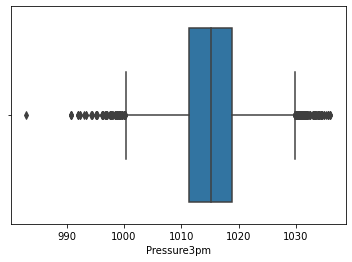

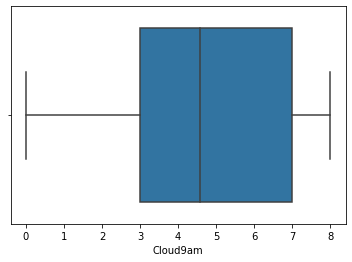

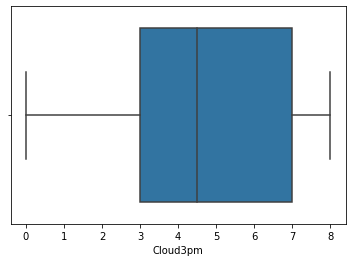

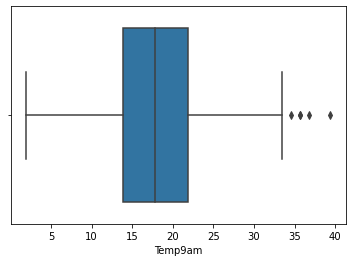

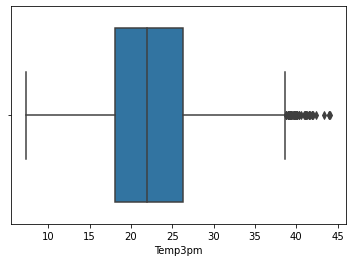

In [46]:
for i in sk:
    sns.boxplot(df[i])
    plt.show()

# Observation

Maxtemp,Rainfall,Evaporation,shunshine,WindGustSpeed,Windspeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3Pm,cloud9am,Temp9am,temp3pm might have outliers

# Bivariate Analysis

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

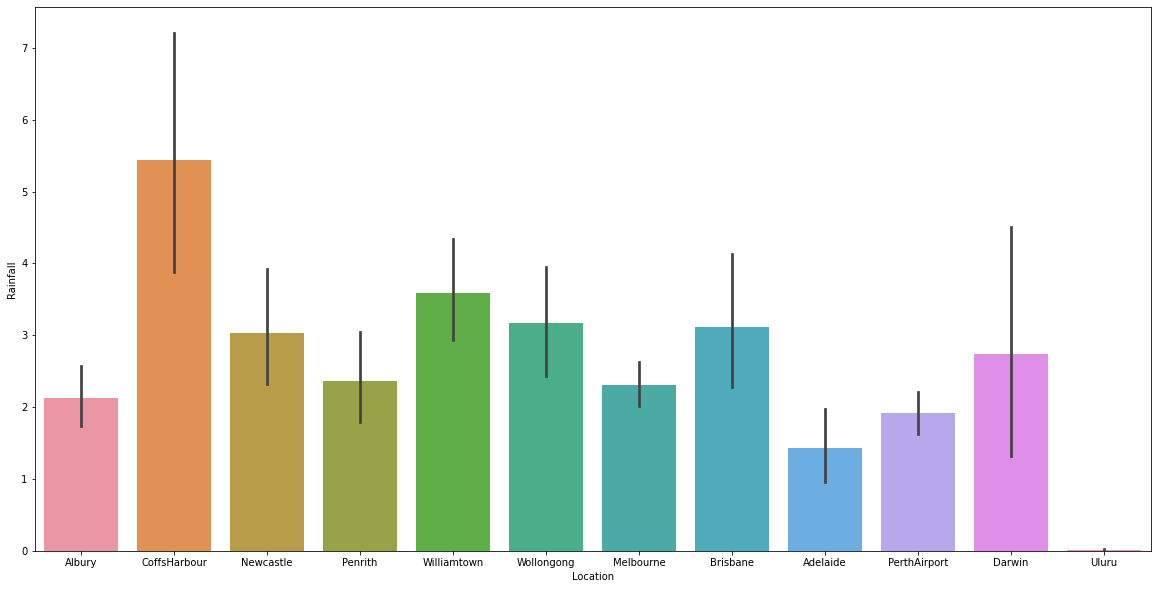

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(df['Location'],df['Rainfall'])

# Observation

CoffsHarbout has higher rainfall overall 

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

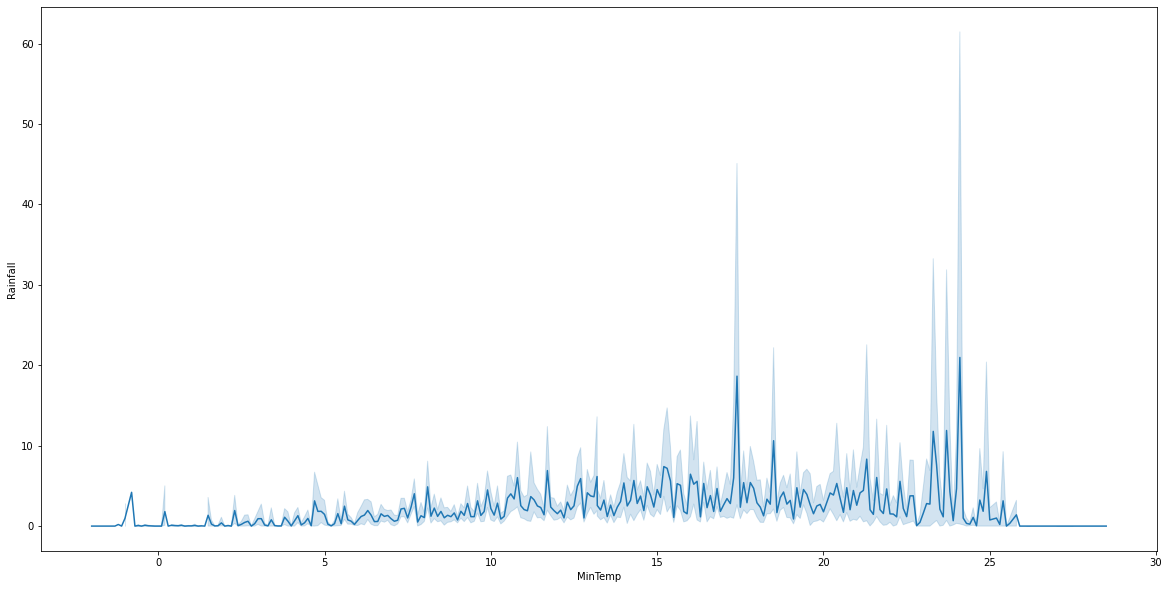

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot(df['MinTemp'],df['Rainfall'])

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

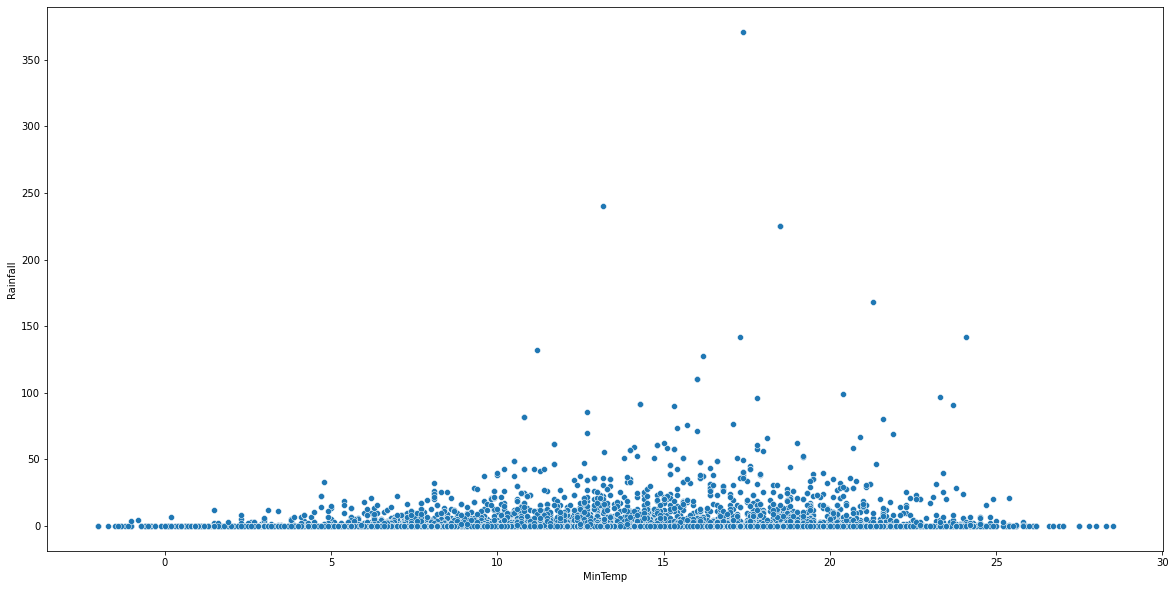

In [53]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['MinTemp'],df['Rainfall'])

# Observation

if MinTemp is higher rainfall is also higher

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

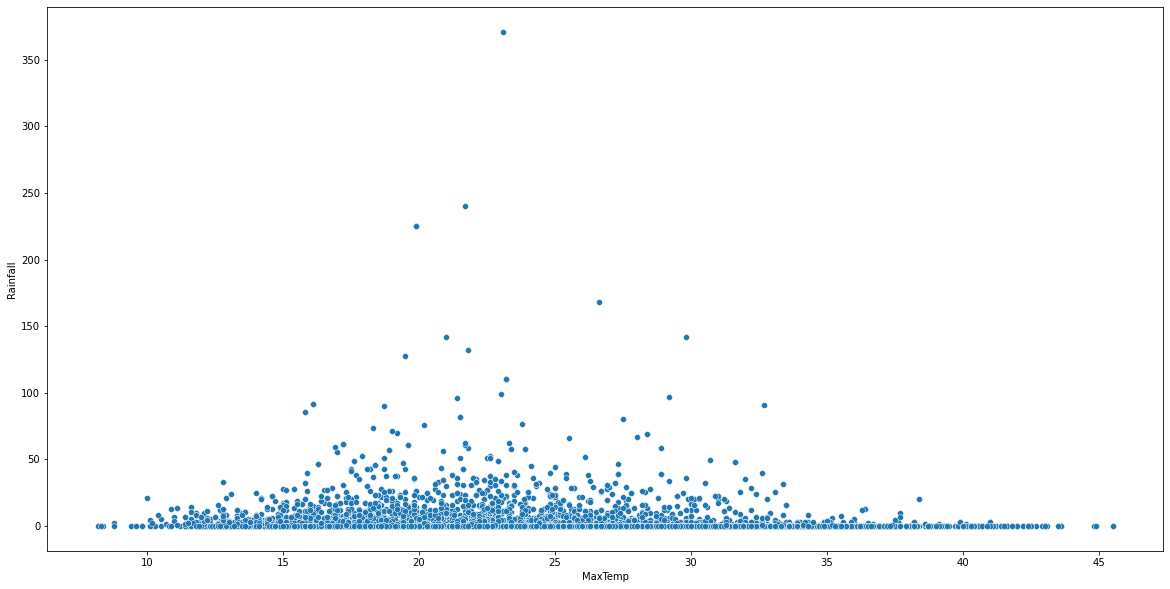

In [54]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['MaxTemp'],df['Rainfall'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

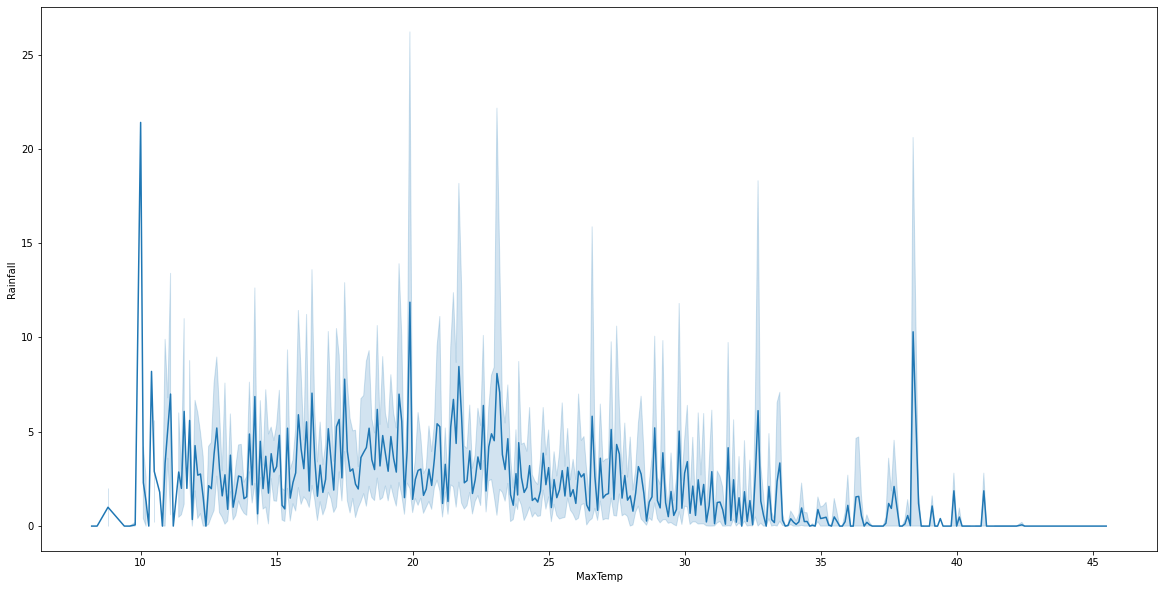

In [55]:
plt.figure(figsize=(20,10))
sns.lineplot(df['MaxTemp'],df['Rainfall'])

# observation

Max Temp is negatively correlated to rainfall

# Observation

Nuclear and Coal has higest capacity mw

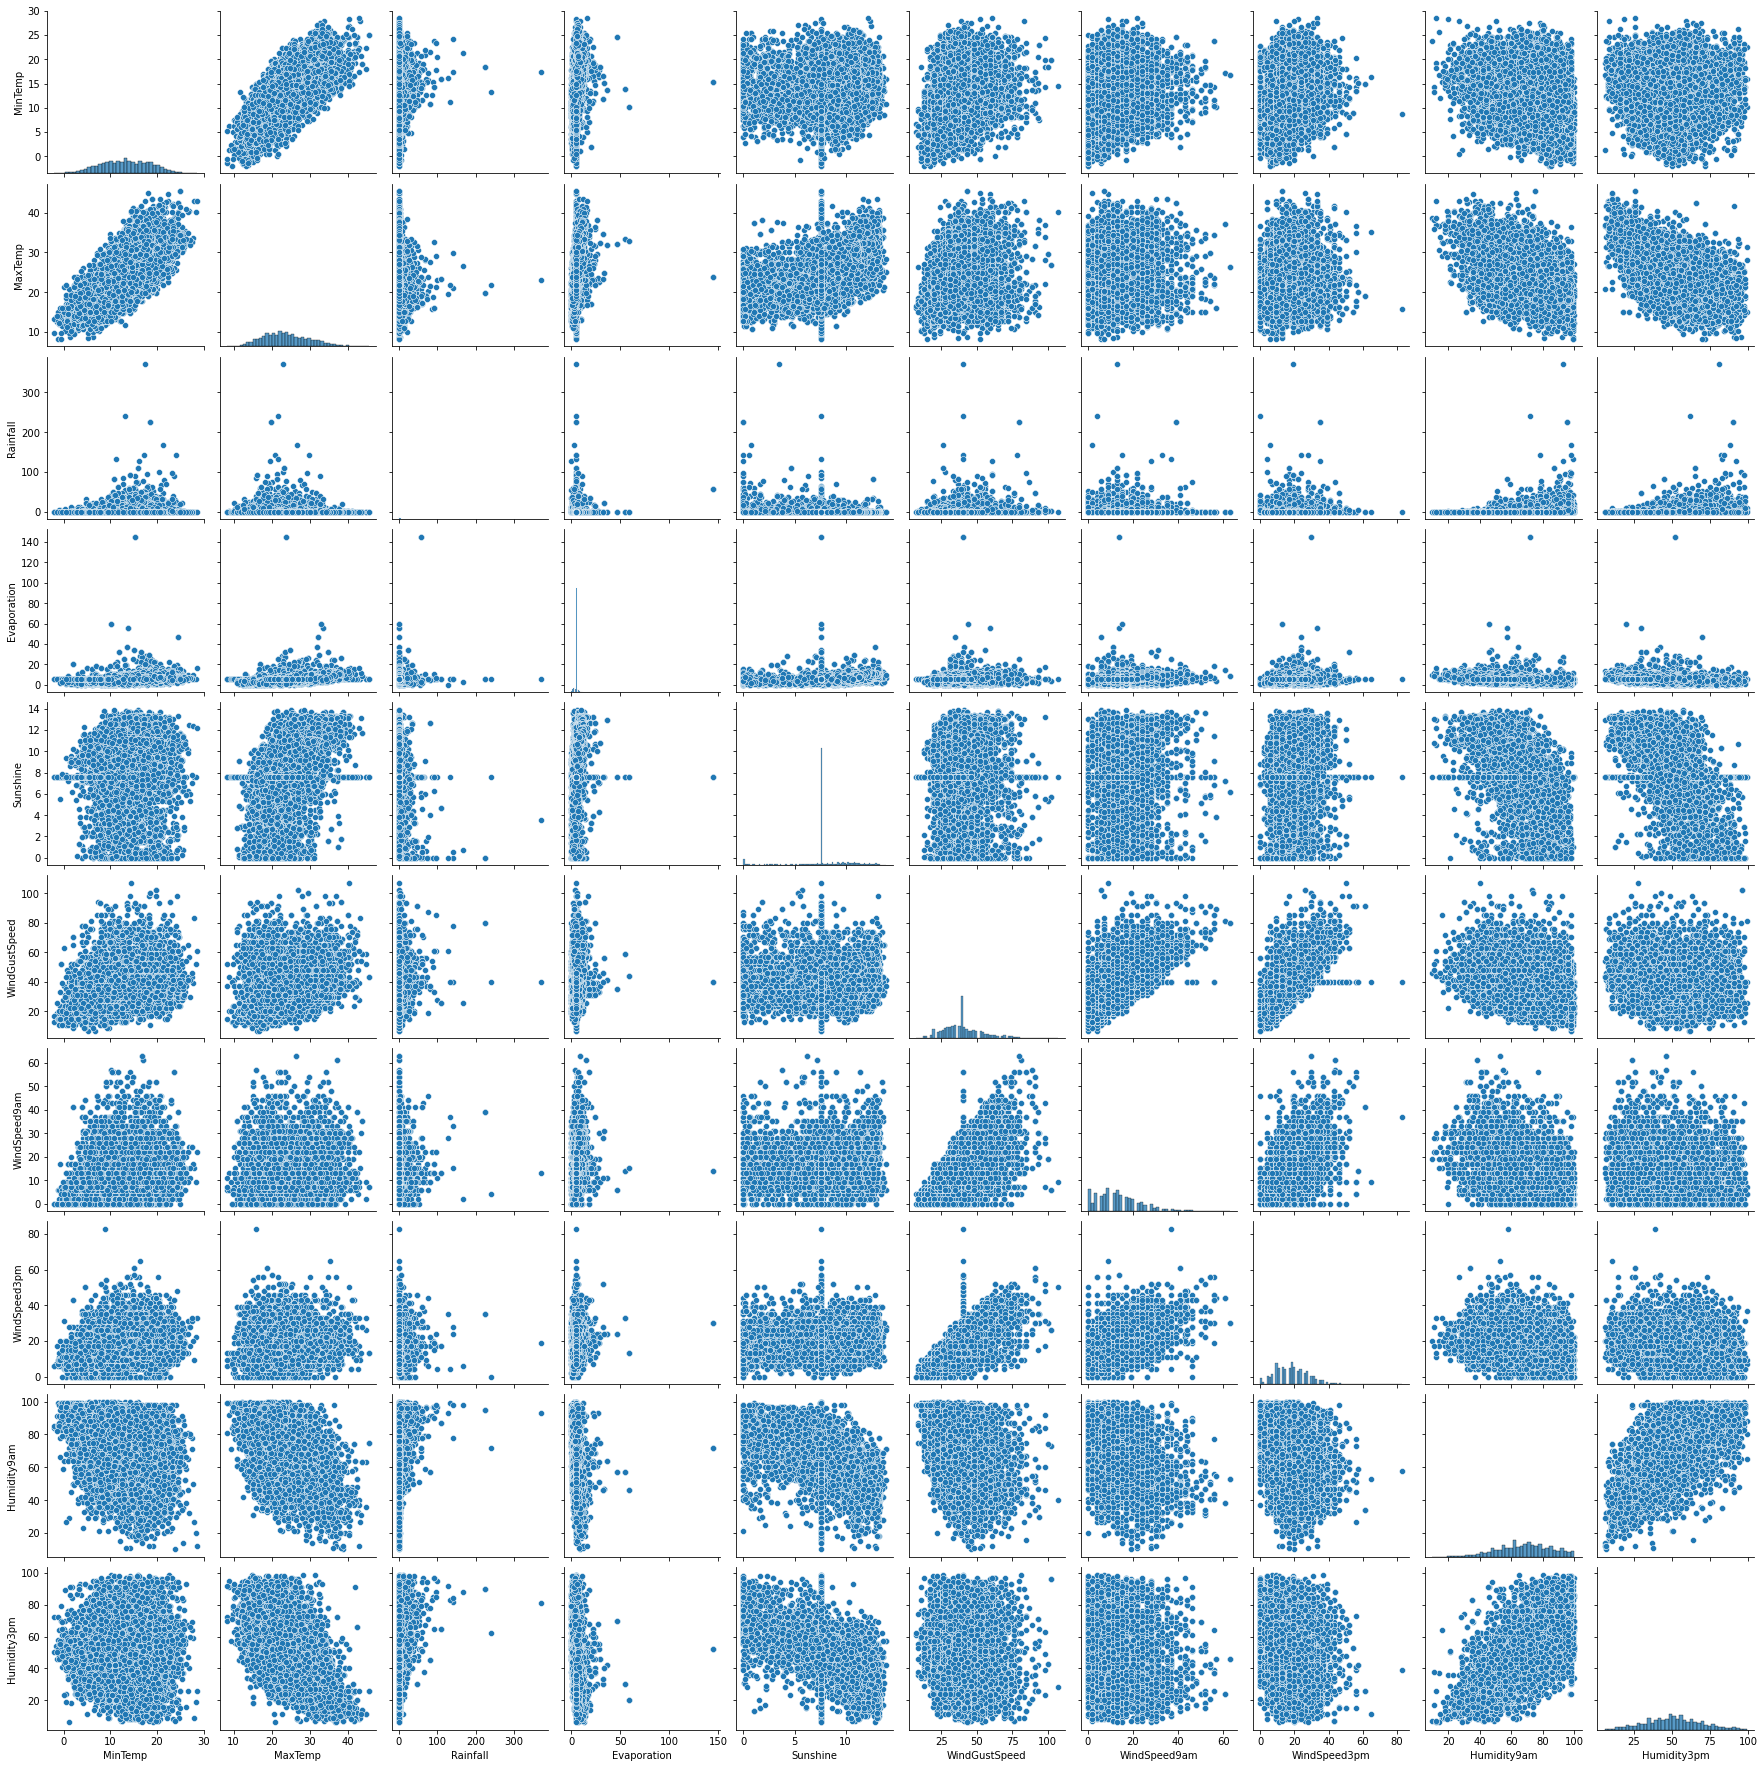

In [64]:
sns.pairplot(df.iloc[:,0:15])

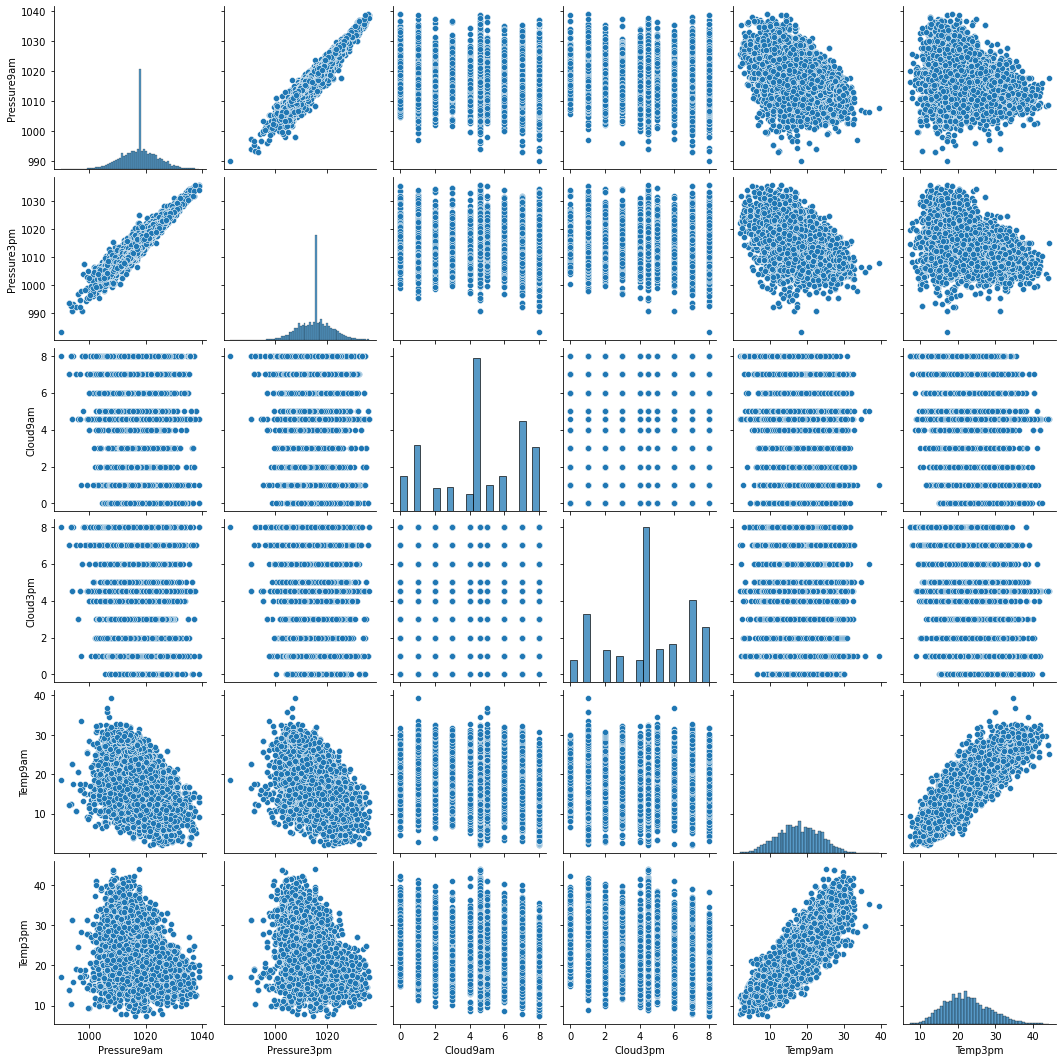

In [65]:
sns.pairplot(df.iloc[:,15:30])

# Observation

Pressure 3 am and pressure9am are positvely correlated

Temp9pm, temp3pm are positvely correlated

Pressure3pm and temp9am are negatively correalted

Pressure9am and Temp9am are also Negatively correlated

Mintemp and Maxtemp are positively correlated

Humidity 9am and max temp are negatively correalted

# Encoding

In [68]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Observation

now i need to encode categorical data

In [70]:
a = pd.get_dummies(df["Location"],prefix='date',drop_first=True)

In [71]:
b = pd.get_dummies(df["WindGustDir"],prefix='dir',drop_first=True)

In [72]:
c = pd.get_dummies(df["WindDir9am"],prefix='9',drop_first=True)

In [73]:
d = pd.get_dummies(df["WindDir3pm"],prefix='3',drop_first=True)

In [74]:
e = pd.get_dummies(df["RainToday"],prefix='4',drop_first=True)

In [75]:
df["day"]  = pd.to_datetime(df["Date"]).dt.day

In [76]:
df["month"]  = pd.to_datetime(df["Date"]).dt.month

In [77]:
df["year"]  = pd.to_datetime(df["Date"]).dt.year

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"].values.reshape(-1,1))

In [80]:
df.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],inplace=True,axis=1)

# Observation

we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

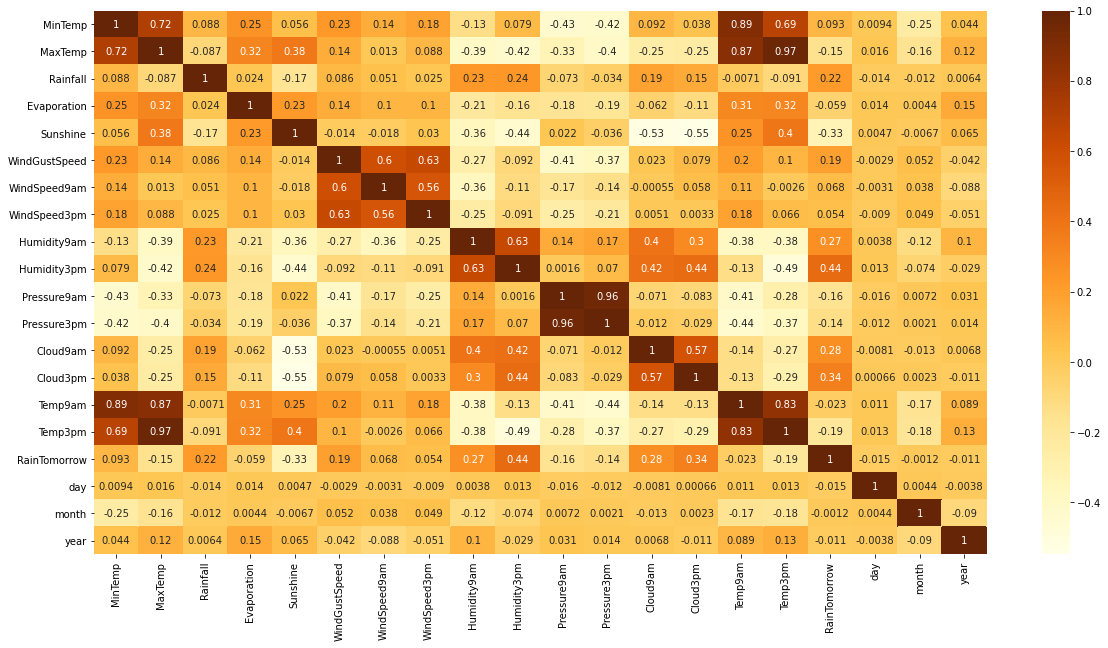

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [83]:
df.corr()["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444808
Cloud3pm         0.344369
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
month           -0.001243
year            -0.011066
day             -0.015461
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64

# observation

Humidity3p,Cloud3pm,cloud9am.rainfall are positvely correalted to raintomorrow

Sunshine,temp3pm,pressure9am,maxtemp,pressure3pm are negatively correalted to raintomorrow

others have very little correlateion with Raintomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

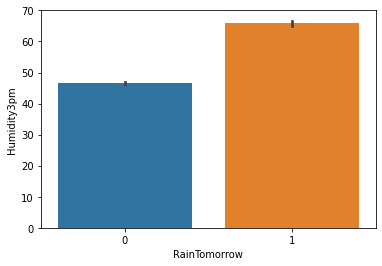

In [85]:
sns.barplot(df['RainTomorrow'],df['Humidity3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

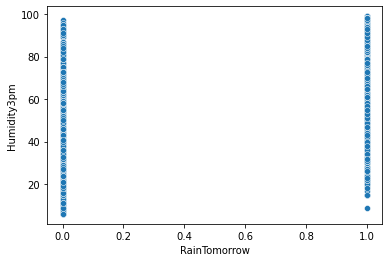

In [86]:
sns.scatterplot(df['RainTomorrow'],df['Humidity3pm'])

# observation

Humidity3pm has positive correlation with raintomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

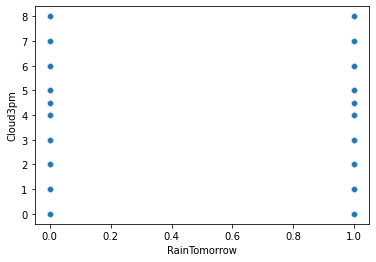

In [90]:
sns.scatterplot(df['RainTomorrow'],df['Cloud3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

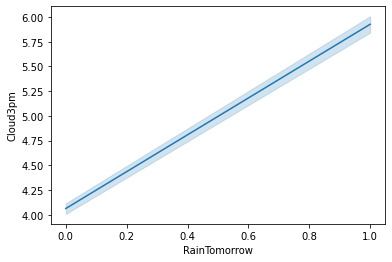

In [91]:
sns.lineplot(df['RainTomorrow'],df['Cloud3pm'])

# observation

Raintomorrow and Cloud3pm has positive correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

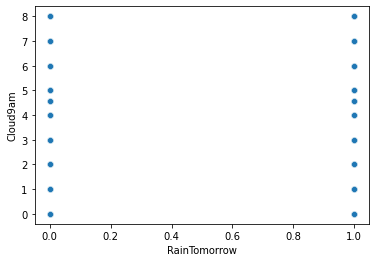

In [94]:
sns.scatterplot(df['RainTomorrow'],df['Cloud9am'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

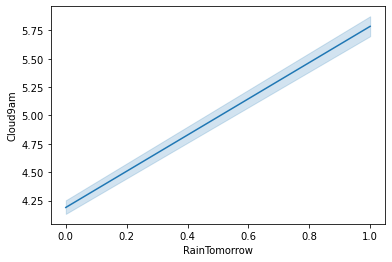

In [95]:
sns.lineplot(df['RainTomorrow'],df['Cloud9am'])

# observation

Raintomorrow and Cloud9am has positive correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

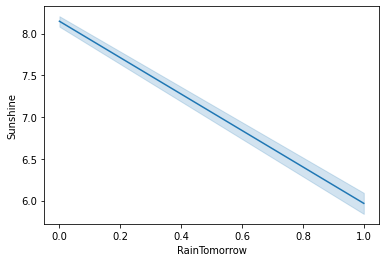

In [97]:
sns.lineplot(df['RainTomorrow'],df['Sunshine'])

# observation

Raintomorrow and sunshine has negative correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

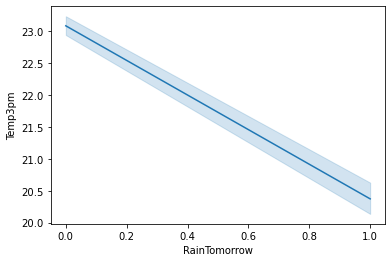

In [100]:
sns.lineplot(df['RainTomorrow'],df['Temp3pm'])

# observation

Raintomorrow and Temp3pm has negative correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

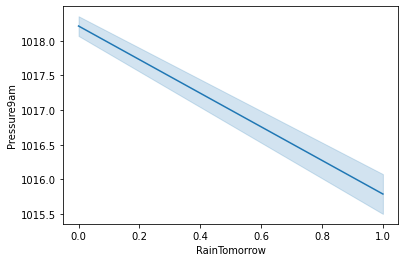

In [102]:
sns.lineplot(df['RainTomorrow'],df['Pressure9am'])

Raintomorrow and 'Pressure9am' has negative correlaion

# Skewness

In [50]:
dc1 = df.drop(["day","month","year","RainTomorrow"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

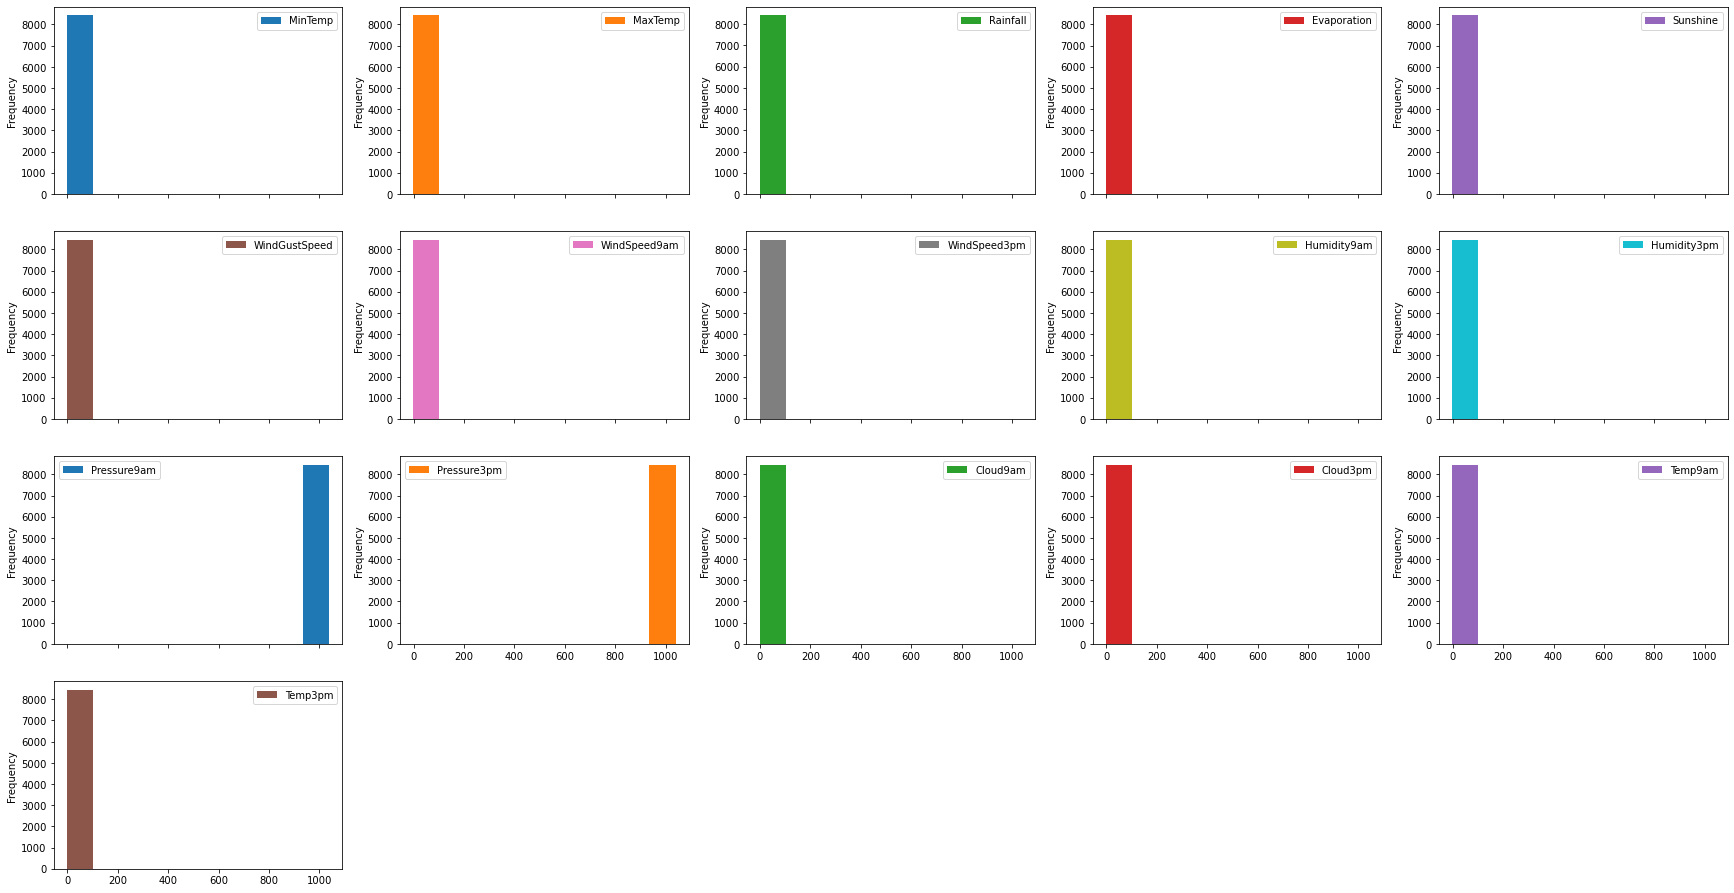

In [51]:
dc1.plot(kind="hist",subplots=True,layout=(5,5),figsize=(30,20))

In [53]:
dc1.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

# observation

we  have skewness so lets proceed with power transform to remove skewness

# Using power_transform for skewness removal

In [54]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [55]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [56]:
dc2.skew()

MinTemp         -0.102983
MaxTemp         -0.010591
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
dtype: float64

# observation

we have removed skewness

# outlier removal

MinTemp             AxesSubplot(0.125,0.125;0.0407895x0.755)
MaxTemp          AxesSubplot(0.173947,0.125;0.0407895x0.755)
Rainfall         AxesSubplot(0.222895,0.125;0.0407895x0.755)
Evaporation      AxesSubplot(0.271842,0.125;0.0407895x0.755)
Sunshine         AxesSubplot(0.320789,0.125;0.0407895x0.755)
WindGustSpeed    AxesSubplot(0.369737,0.125;0.0407895x0.755)
WindSpeed9am     AxesSubplot(0.418684,0.125;0.0407895x0.755)
WindSpeed3pm     AxesSubplot(0.467632,0.125;0.0407895x0.755)
Humidity9am      AxesSubplot(0.516579,0.125;0.0407895x0.755)
Humidity3pm      AxesSubplot(0.565526,0.125;0.0407895x0.755)
Pressure9am      AxesSubplot(0.614474,0.125;0.0407895x0.755)
Pressure3pm      AxesSubplot(0.663421,0.125;0.0407895x0.755)
Cloud9am         AxesSubplot(0.712368,0.125;0.0407895x0.755)
Cloud3pm         AxesSubplot(0.761316,0.125;0.0407895x0.755)
Temp9am          AxesSubplot(0.810263,0.125;0.0407895x0.755)
Temp3pm          AxesSubplot(0.859211,0.125;0.0407895x0.755)
dtype: object

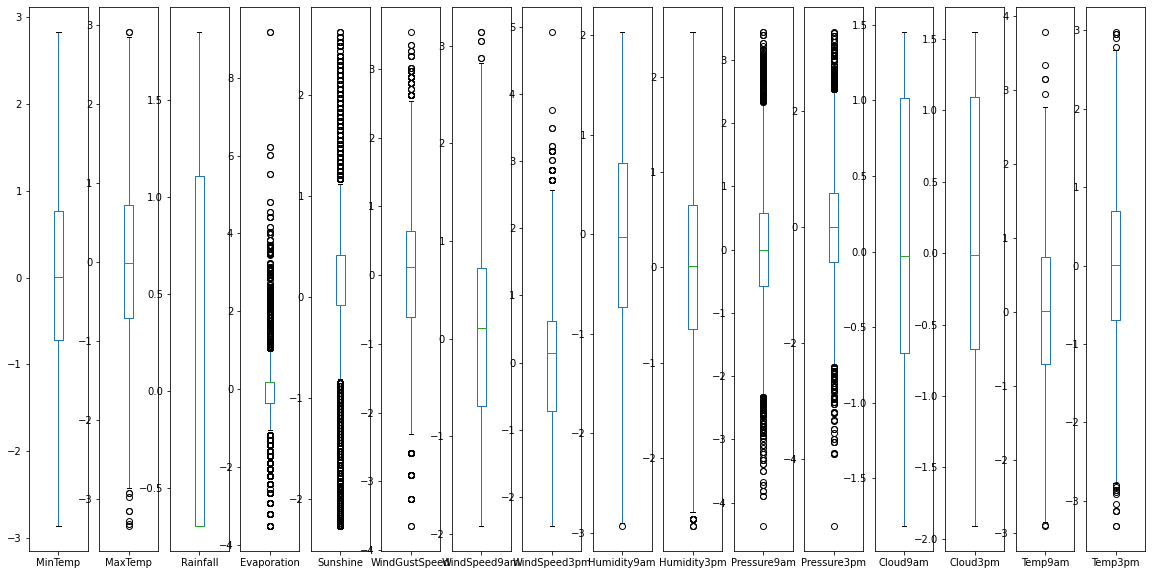

In [57]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [58]:
dc2.shape

(8425, 16)

In [59]:
from scipy.stats import zscore

In [60]:
z = np.abs(zscore(dc2))

In [61]:
np.where(z>3)

(array([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 

In [62]:
df1 = dc2[(z<3).all(axis=1)]

In [63]:
df1.shape

(8193, 16)

# observation

the outliers are removed

# data loss

In [64]:
((8425-8193)/8425)*100

2.7537091988130564

# observation

2.75 % Data loss

# creating categorical data dataframe

In [76]:
cat=["day","month","year","RainTomorrow"]
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

(8425, 4)

In [77]:
dfc1 = dfc.join(a).join(b).join(c).join(d).join(e)

In [78]:
dfc1.shape

(8425, 61)

# removing the outlier removed rows in categorical dataframe

In [79]:
dfc1.drop([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 4619, 4638, 4672, 4678, 4678, 4763,
        4771, 4779, 4780, 4780, 4785, 4797, 4811, 4814, 4854, 4854, 4895,
        4895, 4960, 4960, 5086, 5091, 5108, 5122, 5122, 5123, 5138, 5143,
        5145, 5164, 5165, 5173, 5175, 5175, 5176, 5176, 5214, 5214, 5237,
        5243, 5301, 5339, 5339, 5377, 5379, 5430, 5449, 5483, 5489, 5489,
        5574, 5582, 5590, 5591, 5591, 5596, 5608, 5622, 5625, 5665, 5665,
        5706, 5706, 5771, 5771, 5897, 5902, 5919, 5933, 5933, 5934, 5949,
        5954, 5956, 5975, 5976, 5984, 5986, 5986, 5987, 5987, 6025, 6025,
        6048, 6054, 6112, 6617, 6626, 6660, 6758, 6786, 6786, 6793, 6794,
        6794, 6862, 6876, 6904, 6918, 6925, 6960, 6978, 6993, 7128, 7132,
        7142, 7186, 7187, 7187, 7188, 7462, 7463, 7468, 7494, 7633, 7633,
        7735, 7735, 7984, 8114, 8119],axis=0,inplace=True)

In [80]:
dfc1.shape

(8193, 61)

# Balancing the data

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

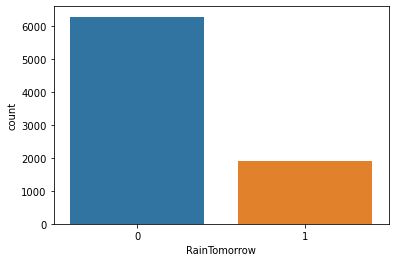

In [87]:
sns.countplot(dfc1.iloc[:,3])

# observation

data imbalance is found so removing them by SMOTE

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [89]:
dfb = df1.join(dfc1)
dx = dfb.drop("RainTomorrow",axis=1)
dy = dfc1.iloc[:,3]

In [90]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

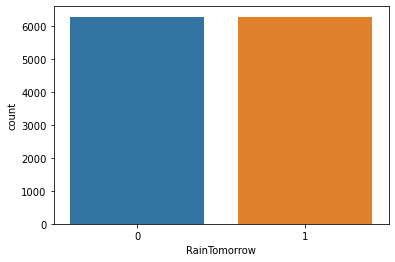

In [91]:
sns.countplot(y)

# observation

now we have removed data imbalance by SMOTE

# Multicolinearity Checking

# variance inflation factor

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(76)]
vif["feature names"] = dft.columns

In [95]:
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
15  35.119149            Temp3pm
1   26.936318            MaxTemp
14  23.580604            Temp9am
10  20.784728        Pressure9am
11  19.913167        Pressure3pm
18  18.143376               year
0   11.640038            MinTemp
9    7.153811        Humidity3pm
17   5.453627              month
75   5.180684              4_Yes
8    5.020004        Humidity9am
2    4.543943           Rainfall
32   4.540588              dir_N
24   4.407964     date_Newcastle
16   4.210908                day
23   3.695826     date_Melbourne
28   3.083592   date_Williamtown
47   2.951390                9_N
6    2.810827       WindSpeed9am
5    2.668809      WindGustSpeed
26   2.604190  date_PerthAirport
68   2.469650               3_SE
19   2.304945        date_Albury
7    2.277002       WindSpeed3pm
12   2.229145           Cloud9am
4    2.213715           Sunshine
13   2.094355           Cloud3pm
21   2.031399  date_CoffsHarbour
67   1.971091                3_S
20   1.959972      date_Brisbane
29   1.851932    date_Wollongong
37   1.842886              dir_S
3    1.782477        Evaporation
56   1.765729               9_SW
62   1.753334                3_N
41   1.736201             dir_SW
74   1.730494              3_WSW
43   1.729467            dir_WNW
69   1.725111              3_SSE
39   1.723848            dir_SSE
42   1.714467              dir_W
25   1.699994       date_Penrith
51   1.691675               9_NW
73   1.673568              3_WNW
72   1.659464                3_W
63   1.630379               3_NE
44   1.628453            dir_WSW
71   1.597274               3_SW
58   1.587332              9_WNW
59   1.560456              9_WSW
66   1.557465               3_NW
38   1.521267             dir_SE
55   1.515125              9_SSW
53   1.508299               9_SE
57   1.505775                9_W
36   1.498566             dir_NW
40   1.495091            dir_SSW
22   1.493244        date_Darwin
64   1.478483              3_NNE
34   1.477957            dir_NNE
70   1.451807              3_SSW
45   1.428726              9_ENE
30   1.423420            dir_ENE
33   1.421519             dir_NE
61   1.414963              3_ESE
49   1.412526              9_NNE
60   1.404202              3_ENE
65   1.401222              3_NNW
52   1.398777                9_S
48   1.390058               9_NE
54   1.358704              9_SSE
31   1.299332            dir_ESE
35   1.287290            dir_NNW
50   1.280663              9_NNW
46   1.251914              9_ESE
27   1.111853         date_Uluru

# observation

Temp3pm has high vif index so dropping it

In [96]:
dft.drop("Temp3pm",axis=1,inplace=True)

In [97]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(75)]
vif["feature names"] = dft.columns

In [98]:
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
14  21.802629            Temp9am
10  20.170240        Pressure9am
11  19.425351        Pressure3pm
17  18.076801               year
0   11.574133            MinTemp
1   11.131348            MaxTemp
16   5.382862              month
74   5.180438              4_Yes
2    4.543417           Rainfall
31   4.535997              dir_N
9    4.436236        Humidity3pm
23   4.399001     date_Newcastle
8    4.362973        Humidity9am
15   4.210708                day
22   3.694637     date_Melbourne
27   3.080114   date_Williamtown
46   2.949228                9_N
6    2.809280       WindSpeed9am
5    2.631970      WindGustSpeed
25   2.604182  date_PerthAirport
67   2.469089               3_SE
18   2.304441        date_Albury
7    2.276841       WindSpeed3pm
12   2.227168           Cloud9am
4    2.212926           Sunshine
13   2.078680           Cloud3pm
20   2.028225  date_CoffsHarbour
66   1.970795                3_S
19   1.956627      date_Brisbane
28   1.847882    date_Wollongong
36   1.842857              dir_S
3    1.782448        Evaporation
55   1.765581               9_SW
61   1.752659                3_N
40   1.734983             dir_SW
73   1.730047              3_WSW
42   1.725873            dir_WNW
68   1.725103              3_SSE
38   1.723594            dir_SSE
41   1.714153              dir_W
24   1.699015       date_Penrith
50   1.691669               9_NW
72   1.673141              3_WNW
71   1.658310                3_W
62   1.628245               3_NE
43   1.627698            dir_WSW
70   1.597077               3_SW
57   1.587090              9_WNW
58   1.560338              9_WSW
65   1.556042               3_NW
37   1.521190             dir_SE
54   1.514824              9_SSW
52   1.508102               9_SE
56   1.505775                9_W
35   1.498044             dir_NW
39   1.494862            dir_SSW
21   1.493219        date_Darwin
63   1.477786              3_NNE
33   1.476004            dir_NNE
69   1.451795              3_SSW
44   1.428539              9_ENE
29   1.422992            dir_ENE
32   1.421388             dir_NE
60   1.414867              3_ESE
48   1.411514              9_NNE
59   1.403494              3_ENE
64   1.401209              3_NNW
51   1.398769                9_S
47   1.390028               9_NE
53   1.358342              9_SSE
30   1.299330            dir_ESE
34   1.285803            dir_NNW
49   1.280464              9_NNW
45   1.251740              9_ESE
26   1.111512         date_Uluru

# observation

Temp9am has high vif index so dropping it

In [99]:
dft.drop("Temp9am",axis=1,inplace=True)

In [101]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(74)]
vif["feature names"] = dft.columns

In [102]:
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
10  19.958305        Pressure9am
11  19.306904        Pressure3pm
16  18.063250               year
1    6.598831            MaxTemp
0    6.101232            MinTemp
15   5.372870              month
73   5.180433              4_Yes
2    4.542810           Rainfall
30   4.530726              dir_N
22   4.398251     date_Newcastle
14   4.210644                day
9    3.805293        Humidity3pm
21   3.578155     date_Melbourne
8    3.103871        Humidity9am
26   3.025713   date_Williamtown
45   2.948536                9_N
6    2.791061       WindSpeed9am
5    2.615513      WindGustSpeed
24   2.587066  date_PerthAirport
66   2.468915               3_SE
17   2.296352        date_Albury
7    2.249359       WindSpeed3pm
12   2.222221           Cloud9am
4    2.207656           Sunshine
13   2.078655           Cloud3pm
19   1.972655  date_CoffsHarbour
65   1.969670                3_S
18   1.925184      date_Brisbane
27   1.847551    date_Wollongong
35   1.842434              dir_S
3    1.782371        Evaporation
54   1.764274               9_SW
60   1.752644                3_N
39   1.733800             dir_SW
72   1.729954              3_WSW
41   1.725796            dir_WNW
67   1.724016              3_SSE
37   1.721996            dir_SSE
40   1.714062              dir_W
23   1.693302       date_Penrith
49   1.691562               9_NW
71   1.673045              3_WNW
70   1.658309                3_W
61   1.628183               3_NE
42   1.626828            dir_WSW
69   1.597000               3_SW
56   1.586341              9_WNW
57   1.557978              9_WSW
64   1.554011               3_NW
36   1.521181             dir_SE
53   1.514813              9_SSW
51   1.508102               9_SE
55   1.504019                9_W
34   1.498043             dir_NW
38   1.494574            dir_SSW
20   1.488699        date_Darwin
62   1.477765              3_NNE
32   1.475262            dir_NNE
68   1.451254              3_SSW
43   1.428450              9_ENE
28   1.422992            dir_ENE
31   1.421336             dir_NE
59   1.414454              3_ESE
47   1.410248              9_NNE
58   1.402875              3_ENE
63   1.401099              3_NNW
50   1.398103                9_S
46   1.388003               9_NE
52   1.358282              9_SSE
29   1.298973            dir_ESE
33   1.285746            dir_NNW
48   1.277986              9_NNW
44   1.251066              9_ESE
25   1.102800         date_Uluru

# Observation

Pressure9am has higher vif index so dropping it

In [103]:
dft.drop("Pressure9am",axis=1,inplace=True)

In [104]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(73)]
vif["feature names"] = dft.columns

In [105]:
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
15  18.030868               year
1    6.388493            MaxTemp
0    5.854337            MinTemp
14   5.368643              month
72   5.179857              4_Yes
29   4.519838              dir_N
2    4.511975           Rainfall
21   4.384062     date_Newcastle
13   4.206445                day
9    3.798680        Humidity3pm
20   3.574808     date_Melbourne
8    3.099992        Humidity9am
25   3.018059   date_Williamtown
44   2.946330                9_N
6    2.790780       WindSpeed9am
5    2.601758      WindGustSpeed
23   2.586840  date_PerthAirport
65   2.468297               3_SE
16   2.296008        date_Albury
7    2.227338       WindSpeed3pm
11   2.220590           Cloud9am
4    2.206288           Sunshine
12   2.077806           Cloud3pm
18   1.967966  date_CoffsHarbour
64   1.962007                3_S
17   1.915937      date_Brisbane
26   1.845970    date_Wollongong
34   1.839618              dir_S
3    1.779529        Evaporation
53   1.764038               9_SW
59   1.730720                3_N
38   1.726447             dir_SW
40   1.725741            dir_WNW
36   1.721114            dir_SSE
71   1.717723              3_WSW
66   1.716461              3_SSE
39   1.712433              dir_W
48   1.691519               9_NW
22   1.687302       date_Penrith
70   1.672321              3_WNW
69   1.649098                3_W
60   1.625227               3_NE
41   1.622401            dir_WSW
68   1.592419               3_SW
55   1.583460              9_WNW
56   1.555848              9_WSW
63   1.553442               3_NW
10   1.542428        Pressure3pm
35   1.519718             dir_SE
52   1.514642              9_SSW
50   1.507763               9_SE
33   1.498024             dir_NW
54   1.494129                9_W
37   1.493940            dir_SSW
19   1.475571        date_Darwin
31   1.473098            dir_NNE
61   1.470373              3_NNE
67   1.447033              3_SSW
42   1.425449              9_ENE
27   1.422920            dir_ENE
30   1.420844             dir_NE
58   1.414443              3_ESE
46   1.410157              9_NNE
57   1.401614              3_ENE
49   1.396646                9_S
62   1.396370              3_NNW
45   1.387876               9_NE
51   1.358281              9_SSE
28   1.298955            dir_ESE
32   1.285344            dir_NNW
47   1.277952              9_NNW
43   1.250332              9_ESE
24   1.102777         date_Uluru

# Observation

Year has higher vif index so dropping it

In [106]:
dft.drop("year",axis=1,inplace=True)

vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(72)]
vif["feature names"] = dft.columns

vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
1    6.383253            MaxTemp
0    5.747650            MinTemp
71   5.060596              4_Yes
28   4.516150              dir_N
2    4.451776           Rainfall
20   4.169695     date_Newcastle
14   3.893425              month
9    3.788341        Humidity3pm
13   3.481394                day
8    3.093765        Humidity9am
19   3.069331     date_Melbourne
43   2.920012                9_N
6    2.789063       WindSpeed9am
5    2.597765      WindGustSpeed
24   2.514649   date_Williamtown
64   2.465637               3_SE
7    2.224295       WindSpeed3pm
11   2.217039           Cloud9am
4    2.204082           Sunshine
22   2.138442  date_PerthAirport
12   2.077103           Cloud3pm
63   1.959911                3_S
15   1.930259        date_Albury
33   1.839009              dir_S
17   1.774241  date_CoffsHarbour
3    1.770163        Evaporation
52   1.754742               9_SW
58   1.730552                3_N
16   1.728346      date_Brisbane
37   1.726398             dir_SW
39   1.725716            dir_WNW
35   1.721047            dir_SSE
65   1.714725              3_SSE
70   1.712862              3_WSW
38   1.712420              dir_W
47   1.681639               9_NW
69   1.670986              3_WNW
25   1.649419    date_Wollongong
68   1.645933                3_W
59   1.624993               3_NE
40   1.622399            dir_WSW
67   1.588638               3_SW
54   1.580459              9_WNW
62   1.552680               3_NW
55   1.552290              9_WSW
10   1.541912        Pressure3pm
34   1.519638             dir_SE
51   1.512546              9_SSW
21   1.509662       date_Penrith
49   1.503430               9_SE
32   1.497779             dir_NW
36   1.493849            dir_SSW
53   1.490447                9_W
30   1.473057            dir_NNE
60   1.469985              3_NNE
66   1.446028              3_SSW
26   1.422917            dir_ENE
29   1.420777             dir_NE
41   1.418084              9_ENE
18   1.417226        date_Darwin
57   1.413783              3_ESE
45   1.406271              9_NNE
56   1.400789              3_ENE
61   1.396369              3_NNW
48   1.394587                9_S
44   1.385131               9_NE
50   1.353906              9_SSE
27   1.298614            dir_ESE
31   1.285334            dir_NNW
46   1.276067              9_NNW
42   1.246714              9_ESE
23   1.082216         date_Uluru

# observaiton

now vif index is within limit so mulitcollinearity is removed from this data set

Multicolinearity Removed

# Standard Scaler

In [113]:
from sklearn.preprocessing import StandardScaler

In [108]:
dfc2 = dft.drop(["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm",
                 "Humidity9am","Humidity3pm","Pressure3pm","Cloud9am","Cloud3pm"],axis=1)

In [111]:
cat1 = ["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm",
                 "Humidity9am","Humidity3pm","Pressure3pm","Cloud9am","Cloud3pm"]

dft1 = pd.DataFrame()
for i in cat1:
    dft1[i] = dft[i]

In [114]:
sc = StandardScaler()
x = sc.fit_transform(dft1)
x_f= pd.DataFrame(x,columns=dft1.columns)

In [115]:
x_final= x_f.join(dfc2)

In [116]:
x_final.shape

(12554, 72)

# observation

we have scaled the input data

# model Training starts

# Importing required libraries

In [117]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [119]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
lr=[]
fl = [dtc,knc,rfc,abc,lr]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(20,80):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)    

 the best random state is 31 and accuracy score is 0.8892871365989645 for algorithm DecisionTreeClassifier()
 the best random state is 40 and accuracy score is 0.8367184388689765 for algorithm KNeighborsClassifier()
 the best random state is 51 and accuracy score is 0.945041816009558 for algorithm RandomForestClassifier()
 the best random state is 40 and accuracy score is 0.8526483472720032 for algorithm AdaBoostClassifier()
 the best random state is 44 and accuracy score is 0.8709677419354839 for algorithm LogisticRegression()


In [120]:
final_result

Algorithm Name  Accuracy Score  \
2  (DecisionTreeClassifier(max_features='auto', r...        0.938272   
0                           DecisionTreeClassifier()        0.888491   
4                               LogisticRegression()        0.870968   
3  (DecisionTreeClassifier(max_depth=1, random_st...        0.852648   
1                             KNeighborsClassifier()        0.836718   

   Cross Validation Score  
2                0.725892  
0                0.705739  
4                0.612627  
3                0.564600  
1                0.723836

In [121]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

# running Support vector classifier induvidually as it consumes more memory

In [122]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.8355236957387495, the cross validation score is 0.7500462189473884 for SVC


# Observation

from all the classifier models random forest performed best with accuracy of 93 % and cross val score of 72 %

# HyperParameter Tunining

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100,200,300]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=51)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]})

In [125]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

# using the best parameters got in grid search 

In [126]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='auto',min_samples_leaf=1,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=51)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9422540820390283, the cross validation score is 0.7172896308037464 


# Observation

# The accuracy score is 94% and cross val score is 71%

In [127]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1240
           1       0.95      0.94      0.94      1271

    accuracy                           0.94      2511
   macro avg       0.94      0.94      0.94      2511
weighted avg       0.94      0.94      0.94      2511



In [128]:
print(confusion_matrix(test_y,pred))

[[1176   64]
 [  81 1190]]


# ROC CURVE

In [129]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

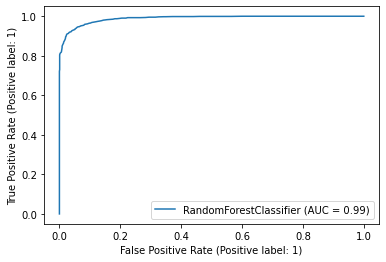

In [130]:
plot_roc_curve(rf,test_x,test_y)

In [131]:
print(f'The ROC_AUC_SCORE IS {roc_auc_score(test_y,pred)}')

The ROC_AUC_SCORE IS 0.9423288749016523


# saving the model

In [132]:
import joblib
joblib.dump(rf,"Raninfall y or n.pkl")

['Raninfall y or n.pkl']

# Predicting How Much Rainfall

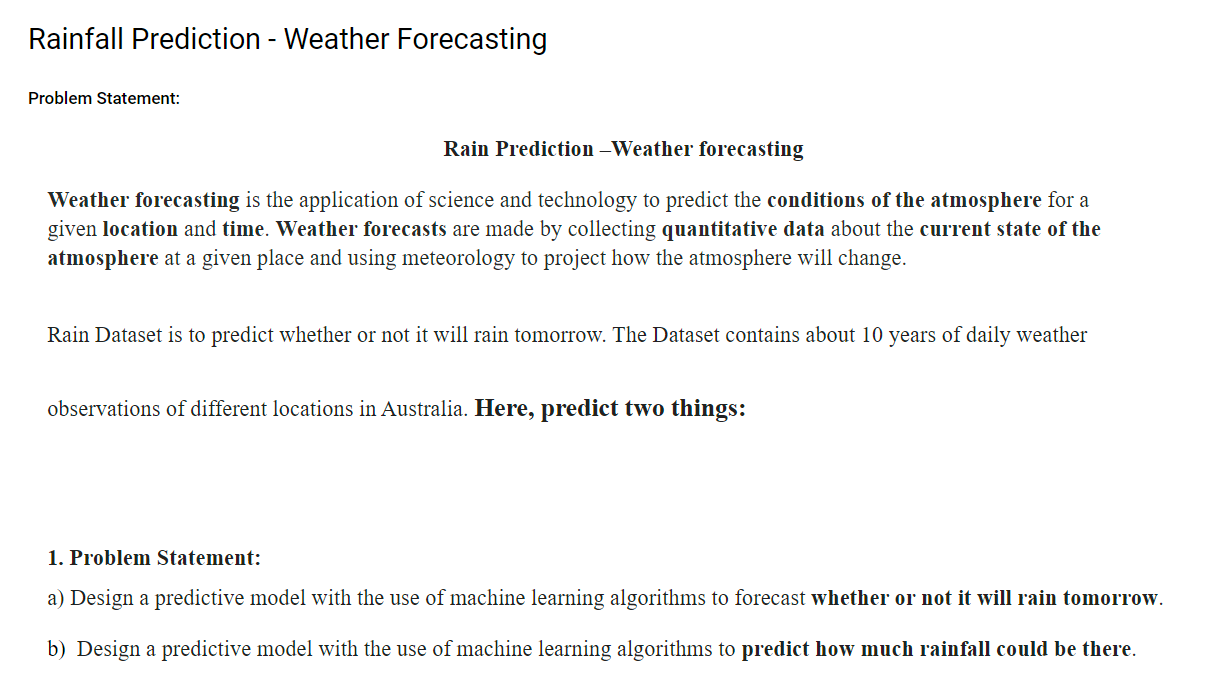

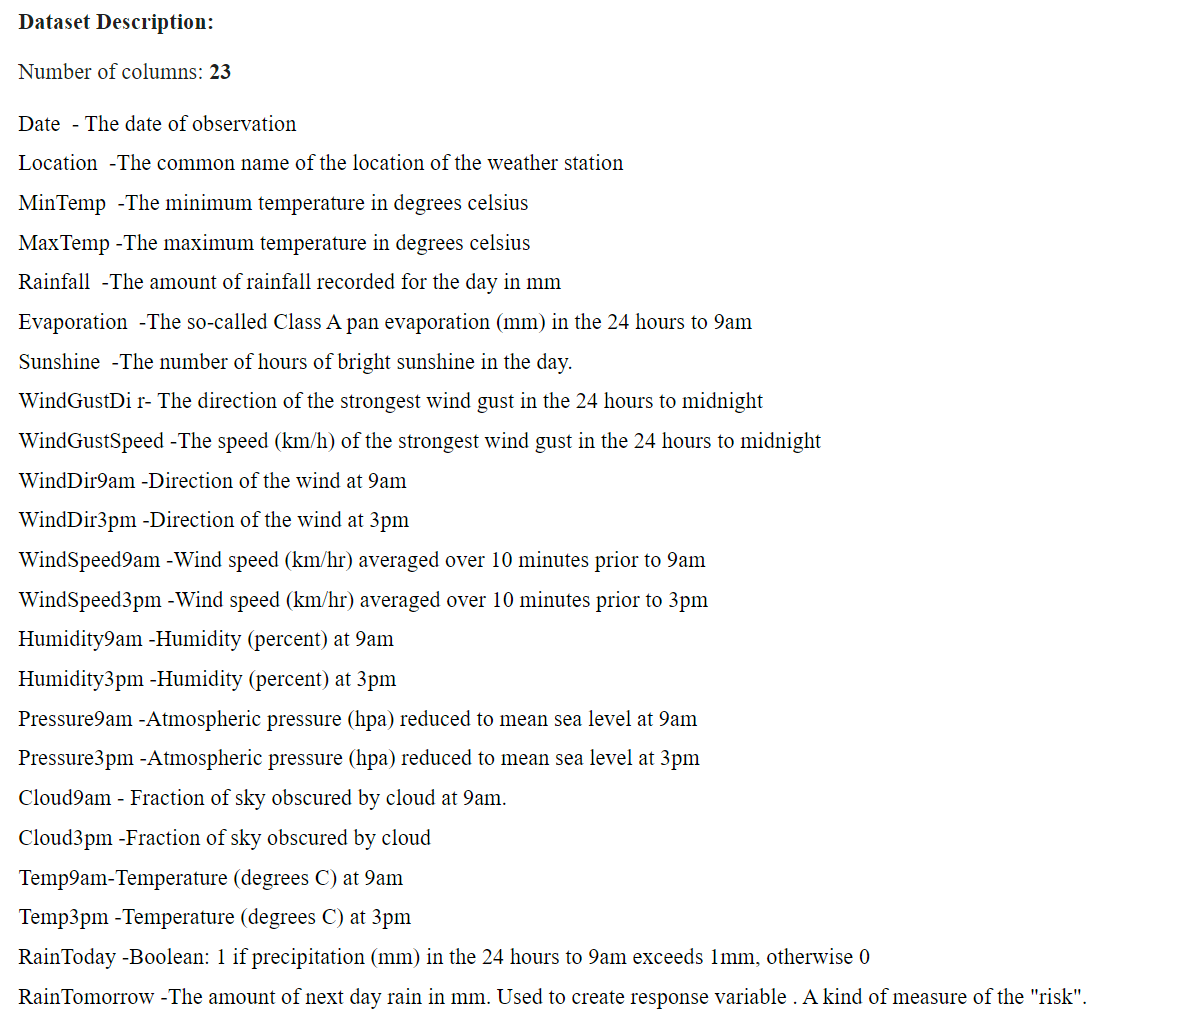

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [107]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN

In [114]:
df.shape

(8425, 23)

# i am going to use all techniques i used earlier on this dataset but considering rainfall as target variable

# null value check

<AxesSubplot:>

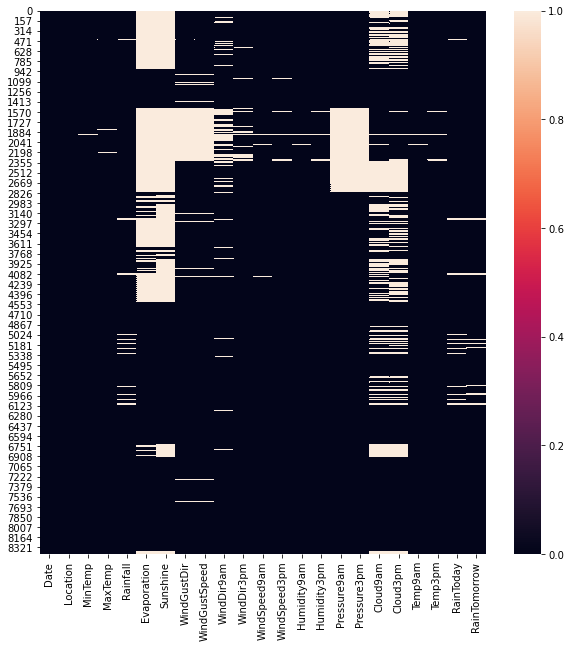

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.shape

(8425, 23)

# observation

We have null values so we will proceed to treat them

# Null value treatment

In [6]:
from sklearn.impute import SimpleImputer
numerical=['Sunshine','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','WindGustSpeed','Rainfall','WindSpeed3pm','Humidity3pm',
           'Temp3pm','WindSpeed9am','MinTemp','MaxTemp','Humidity9am','Temp9am',
          'Evaporation']
categorical=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [7]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [8]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# observation

null values are treated using simple imputer

# Encoding

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Observation

now i need to encode categorical data

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [11]:
a = pd.get_dummies(df["Location"],prefix='date',drop_first=True)

b = pd.get_dummies(df["WindGustDir"],prefix='dir',drop_first=True)

c = pd.get_dummies(df["WindDir9am"],prefix='9',drop_first=True)

d = pd.get_dummies(df["WindDir3pm"],prefix='3',drop_first=True)

e = pd.get_dummies(df["RainToday"],prefix='4',drop_first=True)

df["day"]  = pd.to_datetime(df["Date"]).dt.day

df["month"]  = pd.to_datetime(df["Date"]).dt.month

df["year"]  = pd.to_datetime(df["Date"]).dt.year

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["RainTomorrow"] = oe.fit_transform(df["RainTomorrow"].values.reshape(-1,1))

df.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],inplace=True,axis=1)

In [12]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
day                int64
month              int64
year               int64
dtype: object

# observation

we have successfully converted object data to numeric data

# Skewness Check

In [13]:
dc1 = df.drop(["day","month","year","RainTomorrow","Rainfall"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

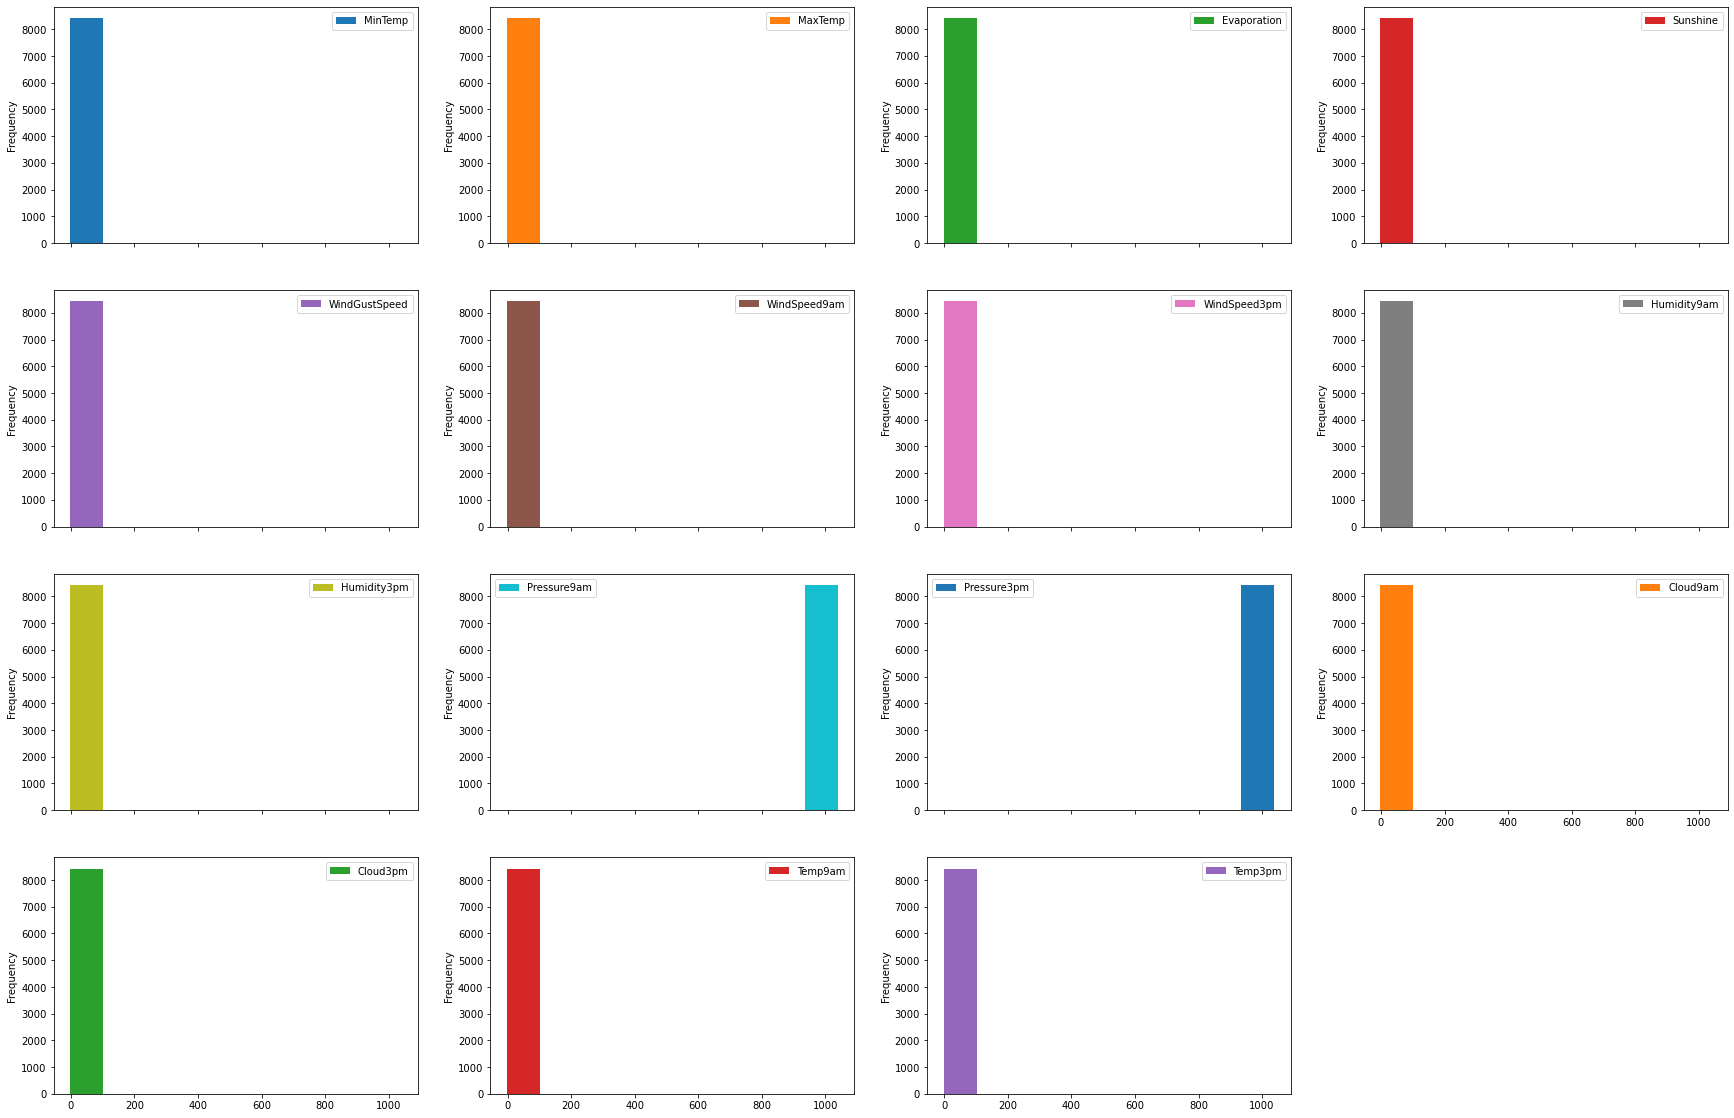

In [14]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [15]:
dc1.skew().sort_values(ascending=False)

Evaporation      14.023948
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

# Observation

almost all features have skewness so lets proceed with power transform to remove skewness

In [16]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [17]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [18]:
dc2.skew()

MinTemp         -0.102983
MaxTemp         -0.010591
Evaporation      0.080305
Sunshine        -0.075544
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
dtype: float64

# observation

skewness removed from data

# Outlier check

In [19]:
from scipy.stats import zscore

MinTemp             AxesSubplot(0.125,0.125;0.0435393x0.755)
MaxTemp          AxesSubplot(0.177247,0.125;0.0435393x0.755)
Evaporation      AxesSubplot(0.229494,0.125;0.0435393x0.755)
Sunshine         AxesSubplot(0.281742,0.125;0.0435393x0.755)
WindGustSpeed    AxesSubplot(0.333989,0.125;0.0435393x0.755)
WindSpeed9am     AxesSubplot(0.386236,0.125;0.0435393x0.755)
WindSpeed3pm     AxesSubplot(0.438483,0.125;0.0435393x0.755)
Humidity9am       AxesSubplot(0.49073,0.125;0.0435393x0.755)
Humidity3pm      AxesSubplot(0.542978,0.125;0.0435393x0.755)
Pressure9am      AxesSubplot(0.595225,0.125;0.0435393x0.755)
Pressure3pm      AxesSubplot(0.647472,0.125;0.0435393x0.755)
Cloud9am         AxesSubplot(0.699719,0.125;0.0435393x0.755)
Cloud3pm         AxesSubplot(0.751966,0.125;0.0435393x0.755)
Temp9am          AxesSubplot(0.804213,0.125;0.0435393x0.755)
Temp3pm          AxesSubplot(0.856461,0.125;0.0435393x0.755)
dtype: object

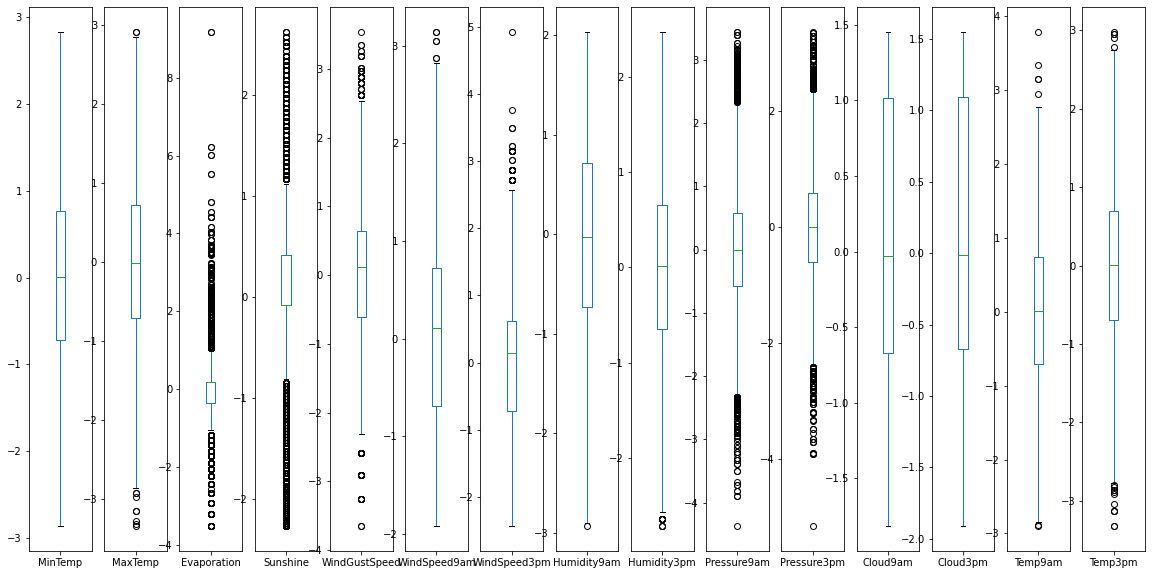

In [20]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [21]:
z = np.abs(zscore(dc2))

In [22]:
np.where(z>3)

(array([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 

# outliers found so proceeding for zscore outlier removal

In [23]:
df1 = dc2[(z<3).all(axis=1)]

In [24]:
df1.shape

(8193, 15)

In [25]:
dc2.shape

(8425, 15)

# Observation

outliers are removed

# Data Loss

In [142]:
((8425-8193)/8425)*100

2.7537091988130564

# observation

2.75 % Dataloss

# Creating Categorical DataFrame with target variable

In [26]:
cat=["day","month","year","RainTomorrow","Rainfall"]
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

dfc1 = dfc.join(a).join(b).join(c).join(d).join(e)

dfc1.shape

(8425, 62)

# removing outliers rows in Dataframe we created earlier

In [27]:
dfc1.drop([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 4619, 4638, 4672, 4678, 4678, 4763,
        4771, 4779, 4780, 4780, 4785, 4797, 4811, 4814, 4854, 4854, 4895,
        4895, 4960, 4960, 5086, 5091, 5108, 5122, 5122, 5123, 5138, 5143,
        5145, 5164, 5165, 5173, 5175, 5175, 5176, 5176, 5214, 5214, 5237,
        5243, 5301, 5339, 5339, 5377, 5379, 5430, 5449, 5483, 5489, 5489,
        5574, 5582, 5590, 5591, 5591, 5596, 5608, 5622, 5625, 5665, 5665,
        5706, 5706, 5771, 5771, 5897, 5902, 5919, 5933, 5933, 5934, 5949,
        5954, 5956, 5975, 5976, 5984, 5986, 5986, 5987, 5987, 6025, 6025,
        6048, 6054, 6112, 6617, 6626, 6660, 6758, 6786, 6786, 6793, 6794,
        6794, 6862, 6876, 6904, 6918, 6925, 6960, 6978, 6993, 7128, 7132,
        7142, 7186, 7187, 7187, 7188, 7462, 7463, 7468, 7494, 7633, 7633,
        7735, 7735, 7984, 8114, 8119],inplace=True,axis=0)

In [29]:
dfc1.shape

(8193, 62)

# Mulitcolinearity Checking 

# variance inflation factor

In [30]:
dft = df1.join(dfc1)
dft.drop('Rainfall',axis=1,inplace=True)
dft.shape

(8193, 76)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(76)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
17  102.598492               year
14   34.396283            Temp3pm
1    28.113179            MaxTemp
9    22.400081        Pressure9am
10   21.938519        Pressure3pm
13   21.900081            Temp9am
0    10.673773            MinTemp
23   10.156346     date_Melbourne
28    8.408605   date_Williamtown
26    7.787949  date_PerthAirport
24    7.759826     date_Newcastle
32    7.408855              dir_N
47    6.939318                9_N
19    6.291064        date_Albury
8     6.173176        Humidity3pm
16    5.424426              month
21    4.862256  date_CoffsHarbour
20    4.699938      date_Brisbane
7     4.426669        Humidity9am
68    4.405135               3_SE
15    4.251210                day
29    3.892422    date_Wollongong
25    3.802383       date_Penrith
56    3.530680               9_SW
67    3.444245                3_S
51    3.248092               9_NW
74    2.943467              3_WSW
37    2.895558              dir_S
59    2.879464              9_WSW
69    2.850832              3_SSE
41    2.805884             dir_SW
62    2.795611                3_N
4     2.784400      WindGustSpeed
58    2.776345              9_WNW
43    2.765327            dir_WNW
5     2.755152       WindSpeed9am
22    2.734343        date_Darwin
42    2.714425              dir_W
39    2.713162            dir_SSE
73    2.691505              3_WNW
72    2.650068                3_W
71    2.605666               3_SW
63    2.600182               3_NE
55    2.598746              9_SSW
44    2.598489            dir_WSW
53    2.525097               9_SE
66    2.491526               3_NW
57    2.489890                9_W
49    2.357646              9_NNE
52    2.289295                9_S
48    2.260820               9_NE
6     2.236303       WindSpeed3pm
38    2.230271             dir_SE
40    2.226775            dir_SSW
36    2.226563             dir_NW
45    2.198329              9_ENE
3     2.147556           Sunshine
70    2.146330              3_SSW
64    2.132178              3_NNE
54    2.108646              9_SSE
61    2.097685              3_ESE
11    2.086894           Cloud9am
34    2.079148            dir_NNE
60    2.054507              3_ENE
65    2.011922              3_NNW
33    1.963141             dir_NE
50    1.940121              9_NNW
18    1.933466       RainTomorrow
30    1.915627            dir_ENE
12    1.890607           Cloud3pm
75    1.888899              4_Yes
2     1.780463        Evaporation
46    1.737311              9_ESE
35    1.685966            dir_NNW
31    1.679028            dir_ESE
27    1.327982         date_Uluru

# Observation

year has high vif index so dropping it

In [ ]:
dft.drop("year",axis=1,inplace=True)

In [35]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(75)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
14  34.385151            Temp3pm
1   28.079953            MaxTemp
9   22.339395        Pressure9am
10  21.930852        Pressure3pm
13  21.882736            Temp9am
0   10.557354            MinTemp
31   7.168947              dir_N
22   6.413983     date_Melbourne
8    6.161172        Humidity3pm
46   6.018927                9_N
23   5.811528     date_Newcastle
27   5.254928   date_Williamtown
16   5.031645              month
7    4.416554        Humidity9am
25   4.303634  date_PerthAirport
15   4.120630                day
67   4.075571               3_SE
18   3.825905        date_Albury
20   3.244871  date_CoffsHarbour
66   3.217876                3_S
55   3.190310               9_SW
19   3.091056      date_Brisbane
50   2.928814               9_NW
36   2.813172              dir_S
4    2.784371      WindGustSpeed
5    2.755128       WindSpeed9am
40   2.730784             dir_SW
42   2.706550            dir_WNW
73   2.691618              3_WSW
68   2.667921              3_SSE
41   2.648171              dir_W
61   2.645184                3_N
58   2.644846              9_WSW
38   2.631682            dir_SSE
24   2.612924       date_Penrith
57   2.561914              9_WNW
28   2.559489    date_Wollongong
72   2.539819              3_WNW
43   2.522875            dir_WSW
71   2.485903                3_W
62   2.446384               3_NE
70   2.419386               3_SW
54   2.382882              9_SSW
65   2.351472               3_NW
52   2.305058               9_SE
56   2.302944                9_W
6    2.228800       WindSpeed3pm
39   2.176328            dir_SSW
35   2.171363             dir_NW
37   2.152174             dir_SE
3    2.146978           Sunshine
48   2.116914              9_NNE
51   2.094755                9_S
11   2.086447           Cloud9am
47   2.039192               9_NE
33   2.034377            dir_NNE
63   2.029139              3_NNE
69   2.027449              3_SSW
21   2.025998        date_Darwin
44   1.962036              9_ENE
60   1.940676              3_ESE
53   1.934348              9_SSE
17   1.924087       RainTomorrow
64   1.921130              3_NNW
32   1.919971             dir_NE
59   1.906631              3_ENE
12   1.889649           Cloud3pm
74   1.884947              4_Yes
29   1.862604            dir_ENE
2    1.780092        Evaporation
49   1.779795              9_NNW
34   1.655196            dir_NNW
30   1.622266            dir_ESE
45   1.602865              9_ESE
26   1.170581         date_Uluru

# observation

Temp3pm has high vif index so dropping it

# Observation

Pressure9am have high Vif index so dropping it 

In [36]:
dft.drop("Temp3pm",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(74)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
9   21.777767        Pressure9am
10  21.481524        Pressure3pm
13  20.577617            Temp9am
1   10.959269            MaxTemp
0   10.484754            MinTemp
30   7.168127              dir_N
21   6.411914     date_Melbourne
45   6.018856                9_N
22   5.783093     date_Newcastle
26   5.233207   date_Williamtown
15   4.988703              month
24   4.296110  date_PerthAirport
8    4.223120        Humidity3pm
14   4.119333                day
66   4.075570               3_SE
7    3.945457        Humidity9am
17   3.816408        date_Albury
19   3.236877  date_CoffsHarbour
65   3.216800                3_S
54   3.190162               9_SW
18   3.090909      date_Brisbane
49   2.928595               9_NW
35   2.813172              dir_S
5    2.755109       WindSpeed9am
4    2.752546      WindGustSpeed
39   2.730426             dir_SW
41   2.705290            dir_WNW
72   2.690771              3_WSW
67   2.667872              3_SSE
40   2.648146              dir_W
57   2.644795              9_WSW
60   2.644732                3_N
37   2.631612            dir_SSE
23   2.612827       date_Penrith
56   2.560789              9_WNW
27   2.548969    date_Wollongong
71   2.538985              3_WNW
42   2.522673            dir_WSW
70   2.483618                3_W
61   2.444834               3_NE
69   2.417983               3_SW
53   2.382580              9_SSW
64   2.348672               3_NW
51   2.304903               9_SE
55   2.302891                9_W
6    2.228791       WindSpeed3pm
38   2.176327            dir_SSW
34   2.171183             dir_NW
36   2.152157             dir_SE
3    2.146817           Sunshine
47   2.116596              9_NNE
50   2.094725                9_S
11   2.085942           Cloud9am
46   2.039112               9_NE
32   2.034091            dir_NNE
62   2.028800              3_NNE
68   2.027282              3_SSW
20   2.025123        date_Darwin
43   1.961964              9_ENE
59   1.940303              3_ESE
52   1.934027              9_SSE
16   1.924066       RainTomorrow
63   1.921002              3_NNW
31   1.919917             dir_NE
58   1.906132              3_ENE
73   1.883913              4_Yes
12   1.876989           Cloud3pm
28   1.862599            dir_ENE
2    1.780091        Evaporation
48   1.779257              9_NNW
33   1.654230            dir_NNW
29   1.622107            dir_ESE
44   1.602758              9_ESE
25   1.169559         date_Uluru

# observation

Pressure9am has higher vif index so droppin it

In [37]:
dft.drop("Pressure9am",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(73)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
12  20.224087            Temp9am
0   10.441220            MinTemp
1   10.431903            MaxTemp
29   7.159483              dir_N
20   6.403852     date_Melbourne
44   6.003613                9_N
21   5.783092     date_Newcastle
25   5.133377   date_Williamtown
14   4.987590              month
23   4.261921  date_PerthAirport
8    4.223079        Humidity3pm
13   4.117573                day
65   4.075327               3_SE
7    3.932330        Humidity9am
16   3.811175        date_Albury
64   3.204765                3_S
18   3.190102  date_CoffsHarbour
53   3.174384               9_SW
17   3.034631      date_Brisbane
48   2.919089               9_NW
34   2.806460              dir_S
5    2.753899       WindSpeed9am
4    2.735295      WindGustSpeed
38   2.723332             dir_SW
40   2.705015            dir_WNW
71   2.679622              3_WSW
66   2.655445              3_SSE
39   2.646193              dir_W
36   2.628354            dir_SSE
56   2.621596              9_WSW
22   2.612808       date_Penrith
59   2.612308                3_N
55   2.540130              9_WNW
70   2.538415              3_WNW
26   2.532421    date_Wollongong
41   2.516205            dir_WSW
69   2.474127                3_W
60   2.436873               3_NE
68   2.412043               3_SW
52   2.373749              9_SSW
63   2.347935               3_NW
50   2.303055               9_SE
54   2.270404                9_W
6    2.215823       WindSpeed3pm
37   2.174439            dir_SSW
33   2.171172             dir_NW
35   2.149265             dir_SE
3    2.141431           Sunshine
46   2.113702              9_NNE
10   2.084882           Cloud9am
49   2.083478                9_S
45   2.036791               9_NE
31   2.033027            dir_NNE
67   2.020180              3_SSW
61   2.018130              3_NNE
19   1.981372        date_Darwin
42   1.961879              9_ENE
58   1.940303              3_ESE
51   1.930884              9_SSE
30   1.919425             dir_NE
15   1.917084       RainTomorrow
62   1.913623              3_NNW
57   1.904743              3_ENE
11   1.875170           Cloud3pm
72   1.874546              4_Yes
27   1.862594            dir_ENE
47   1.775636              9_NNW
2    1.774704        Evaporation
32   1.653951            dir_NNW
9    1.636167        Pressure3pm
28   1.621942            dir_ESE
43   1.602654              9_ESE
24   1.169168         date_Uluru

# observation

Temp9am has high vif index so dropping it

In [38]:
dft.drop("Temp9am",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(72)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
28   7.157319              dir_N
19   6.252568     date_Melbourne
1    6.214326            MaxTemp
43   6.003233                9_N
20   5.780878     date_Newcastle
0    5.582265            MinTemp
24   5.106698   date_Williamtown
13   4.959064              month
22   4.253931  date_PerthAirport
12   4.116965                day
64   4.075322               3_SE
15   3.786417        date_Albury
8    3.666095        Humidity3pm
63   3.203802                3_S
52   3.171960               9_SW
17   3.133335  date_CoffsHarbour
16   3.014589      date_Brisbane
47   2.919089               9_NW
7    2.835256        Humidity9am
33   2.805989              dir_S
5    2.730434       WindSpeed9am
4    2.722340      WindGustSpeed
37   2.721778             dir_SW
39   2.704995            dir_WNW
70   2.679618              3_WSW
65   2.653709              3_SSE
38   2.645998              dir_W
35   2.627369            dir_SSE
55   2.616928              9_WSW
58   2.611478                3_N
21   2.602237       date_Penrith
54   2.539128              9_WNW
69   2.537988              3_WNW
25   2.531020    date_Wollongong
40   2.515180            dir_WSW
68   2.474016                3_W
59   2.435875               3_NE
67   2.412014               3_SW
51   2.373738              9_SSW
62   2.344837               3_NW
49   2.303047               9_SE
53   2.269283                9_W
36   2.173985            dir_SSW
32   2.171160             dir_NW
6    2.169351       WindSpeed3pm
34   2.149261             dir_SE
3    2.138858           Sunshine
45   2.112819              9_NNE
48   2.082887                9_S
10   2.079660           Cloud9am
44   2.034489               9_NE
30   2.031714            dir_NNE
66   2.019818              3_SSW
60   2.017843              3_NNE
18   1.980355        date_Darwin
41   1.961879              9_ENE
57   1.940129              3_ESE
50   1.930738              9_SSE
29   1.919425             dir_NE
14   1.917012       RainTomorrow
61   1.913459              3_NNW
56   1.902585              3_ENE
11   1.874897           Cloud3pm
71   1.870440              4_Yes
26   1.862593            dir_ENE
2    1.774509        Evaporation
46   1.773338              9_NNW
31   1.653869            dir_NNW
9    1.629896        Pressure3pm
27   1.621443            dir_ESE
42   1.602385              9_ESE
23   1.154400         date_Uluru

# observation

now vif index is within limit so mulitcollinearity is removed from this data set

# Multicolinearity Removed

In [45]:
x_final= dft

x_final.shape

(8193, 72)

In [44]:
y=dfc1.iloc[:,4]

# Model Training Starts

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# This Code Block ranks algorithm whcih performed best based on cross val score and test score

In [47]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   

the best random state is 53 and best accuracy is 0.30298004904380105 for LinearRegression()
the training score is 0.30298004904380105 the testing score is 0.1529080925038735 the cross val score is 0.23785054647602583 for LinearRegression()
the best random state is 0 and best accuracy is 1.0 for DecisionTreeRegressor()
the training score is 1.0 the testing score is 0.23246622022899033 the cross val score is -0.5135673101945513 for DecisionTreeRegressor()
the best random state is 53 and best accuracy is 0.3029784670468214 for Ridge()
the training score is 0.3029784670468214 the testing score is 0.1529295722142634 the cross val score is 0.23828063467272526 for Ridge()
the best random state is 53 and best accuracy is 0.20002873735473814 for Lasso()
the training score is 0.20002873735473814 the testing score is 0.08804952281672362 the cross val score is 0.18316755209041144 for Lasso()
the best random state is 33 and best accuracy is 0.49428694330305256 for KNeighborsRegressor()
the training

In [48]:
final_result

Model Name  Train Score  Test Score  \
5  (DecisionTreeRegressor(max_features='auto', ra...     0.932123    0.246332   
2                                            Ridge()     0.302978    0.152930   
0                                 LinearRegression()     0.302980    0.152908   
3                                            Lasso()     0.200029    0.088050   
4                              KNeighborsRegressor()     0.494287    0.160576   
1                            DecisionTreeRegressor()     1.000000    0.232466   
6  (DecisionTreeRegressor(max_depth=3, random_sta...    -1.035703   -2.831953   

   Cross Val Score  
5         0.461327  
2         0.238281  
0         0.237851  
3         0.183168  
4         0.118820  
1        -0.513567  
6        -1.899600

In [49]:
final_result["Model Name"][5]

RandomForestRegressor()

# Random Foreset RegressorPerformed Best compared to all

# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
rf = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100,200]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=33)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 200]})

In [53]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

# Running Random Forest with Best Parameters

In [54]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=33)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 1.0 the testing score is 0.3918386016861449 the cross val score is 0.4890983979345707
Mean Squared Error 65.02500957822078
Mean Absolute Error 1.5359711984802233
Root Mean Squared Error 8.06380862733118
R2 Score 0.3918386016861449


# after tuning training score gets 100% and testing score 39 % and cross val socre 49%

# Saving the model

In [55]:
import joblib
joblib.dump(rf,"Rainfall amount.pk")

['Rainfall amount.pk']